# Mushrooms 🍄
by Ekaterina Boyarkina, Linnéa Mehling, Jing Yan

#  **1. Introduction**

# **Is a mushroom poisonous or not?**


This dataset contains nine numeric and categorical features, which are considered important when analyzing whether a mushroom is poisonous or not, including:
*   Cap-diameter (continuous feature ranging from 0 to 1891)
*   Cap-shape (categorical feature that consists out of 6 categories)
*   Gill-attachment (categorical feature that consists out of 6 categories)
*   Gill-color  (categorical feature that consists out of 11 categories)
*   Stem-height (continuous feature ranging from 0 to 3.8)
*   Stem-width (continuous feature ranging from 0 to 3569)
*   Stem-color (categorical feature that consists out of 12 categories)
*   Season (categorical feature that consists out of 4 categories)
*   Class ( categorical feature that consists out 0 and 1)


The last feature "Class" refers to contains two values - 0 or 1 - where 0 refers to edible and 1 refers to poisonous.

## **1.1 Goal**


We aim to answer the question:


*   Is a mushroom poisonous or not?



This dataset is a cleaned version of the original Mushroom Dataset for Binary Classification available at UCI Library.

**Importing all the important libraries:**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_curve, auc, PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tabulate import tabulate

## **1.2 Understanding the basic info of data structure**

First, we check the structure of the dataset

In [ ]:
df = pd.read_csv('mushroom_cleaned.csv')
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [ ]:
print(df.head())

   cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2          10     3.787572   
4          1305          6                2          10     3.711971   

   stem-width  stem-color    season  class  
0        1545          11  1.804273      1  
1        1557          11  1.804273      1  
2        1566          11  1.804273      1  
3        1566          11  1.804273      1  
4        1464          11  0.943195      1  


We looked for blank cells and the datatype, but only discovered numerical columns and no blank cells, in other words, we do not have missing values.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB
None


A statistic summary of the columnns


As an overview of the data, we have the following attributes:


|Feature name         | Variable type | Description                     |
| ------------------- | ------- | ----------------------------- |
| Cap-diameter           | continuous      | diameter of the mushroom cap                     |
| Cap-shape             | categorical      | type of the cap of the mushroom                         |
| Gill-attachment            | categorical     | the part on the bottom of the cap
| Gill-color             | categorical      |11 colors|
| Stem-height          | continuous      | height of the mushroom stem                          |
| Stem-width           | continuous     | width of the mushroom stem                       |
| Stem-color            | categorical      | 12 colors                           |
| Season             | categorical       |a floating point number for each season                       |

**Our question** is focused on determining whether a mushroom is poisonous based on its features. This constitutes a binary classification problem, as the class variable (whether a mushroom is poisonous) has two possible outcomes: 1 (poisonous) and 0 (not poisonous).  
This is a supervised learning task because our dataset includes labeled examples, where each mushroom's class (poisonous
or not) is already provided.


*   If the dataset is balanced (classes are balanced), then **accuracy, precision, recall and F1 score** are useful metrics.
*   If the dataset is not balanced, metrics like **precision, recall, F1 score, and ROC-AUC** are more useful because accuracy can be misleading.



In terms of the real-world performance, we would probably want to minimize **false negatives** (predicting that a mushroom is not poisonous when it is). In that case, we might want to prioritize recall over precision.  
Generally, accuracy would also need to be significantly higher than random guessing.

So next, we will begin data analysis based on the findings from the data types.

# **2. Exploratory  Data Analysis**

Since most of our data features are represented numerically, in order to give substance to our data analysis, we want to first understand the actual meanings behind these numbers.

## **2.1 Data Cleaning - Data Cleaning - Using Season as an Example**

### **2.1.1 Identifying features' meanings**

Let's look at the categorical attributes closer. There is an issue with seasons since each season corresponds to **a floating point number**, which logically doesn't make sense given it's a categorical attribute. So let's see how we can identify which number corresponds to which season


In [ ]:
season = df["season"]
unique_seasons = season.unique()

for season in unique_seasons:
  print(season)

1.804272708628173
0.9431945538974952
0.8884502877862838
0.0273721330556057


There are four unique value in this dataset, which points to the fact that each one of them should correspond to a particular season but there is no way of figuring it out just from this dataset.



### **2.1.2 Retrieve the original data**


We can import the uncleaned version of this dataset, where each season is represented by a letter instead of a floating-point number. Then, we can compare the proportions of each season in the uncleaned dataset to the **proportions** in the cleaned dataset.

In [ ]:
original_df = pd.read_csv('secondary_data.csv', delimiter=';')
season_counts = original_df['season'].value_counts()
print("Counts of each unique value in the 'season' column of the uncleaned dataset:")
print(season_counts.to_string())

Counts of each unique value in the 'season' column of the uncleaned dataset:
season
a    30177
u    22898
w     5267
s     2727


In [ ]:
season_counts1 = df['season'].value_counts()
print("Counts of each unique value in the 'season' column of the clean dataset:")
print(season_counts1.to_string())

Counts of each unique value in the 'season' column of the clean dataset:
season
3.0    27210
2.0    20387
4.0     4219
1.0     2219


From these results, we observe that autumn has the highest number of instances, followed by summer, winter, and spring. Therefore, in the cleaned dataset, the proportions of each season are as follows:  
spring: 0.02737213 = 1  
summer: 0.88845029  = 2  
autumn: 0.94319455 = 3  
winter: 1.80427271 = 4  


Now we can change these values to 1, 2, 3, 4 respectively to have less noisy data.


In [ ]:
df_copy = df.copy()
df_copy.loc[np.isclose(df_copy["season"], 0.02737213), "season"] = 1
df_copy.loc[np.isclose(df_copy["season"], 0.88845029), "season"] = 2
df_copy.loc[np.isclose(df_copy["season"], 0.94319455), "season"] = 3
df_copy.loc[np.isclose(df_copy["season"], 1.80427271), "season"] = 4
df = df_copy

Making sure that it worked for the whole dataset

In [ ]:
df["season"]

0        4.0
1        4.0
2        4.0
3        4.0
4        3.0
        ... 
54030    3.0
54031    3.0
54032    2.0
54033    2.0
54034    2.0
Name: season, Length: 54035, dtype: float64

Now, since there is no explicit information on what each categorical value's number means, we figured out (with the help of professor Voigtlaender) what each number stands for:

In [ ]:
# The following is copied from the notebook written by Professor Voigtlaender:
features = list(df.columns)
original_df = original_df[features]

for feature in ['cap-diameter', 'stem-height', 'stem-width']:
    mean = original_df[feature].mean()
    std = original_df[feature].std()
    original_df = original_df[np.abs(original_df[feature] - mean) <= 3*std]

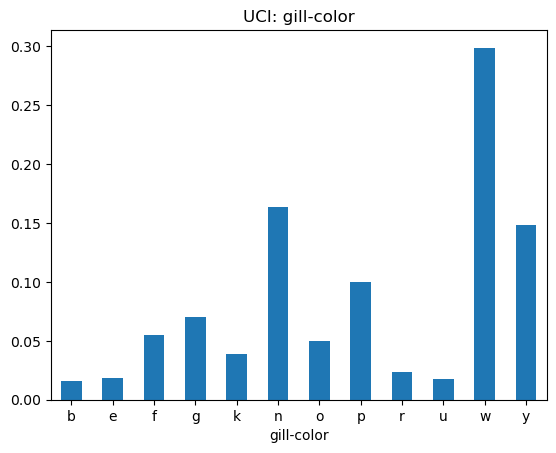

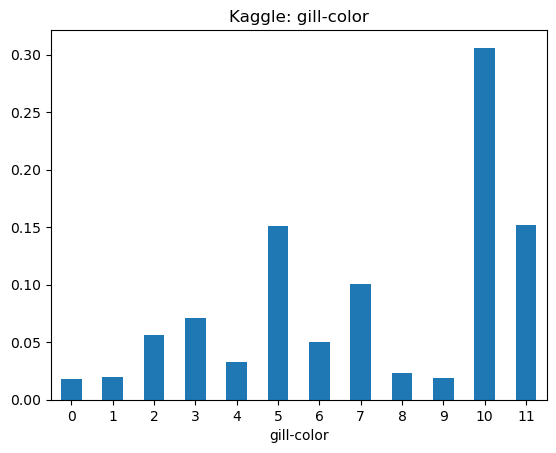

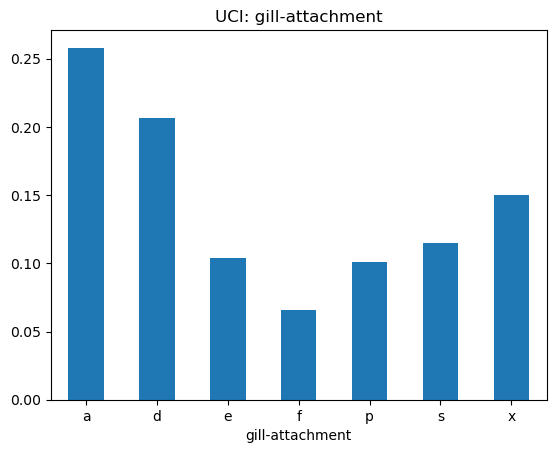

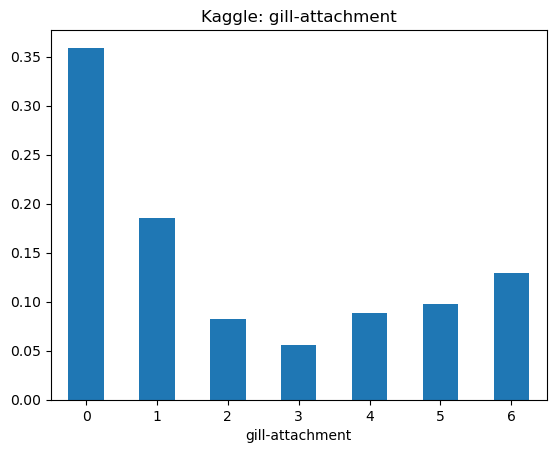

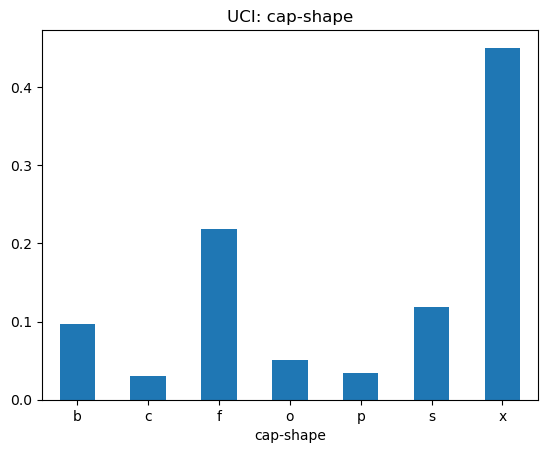

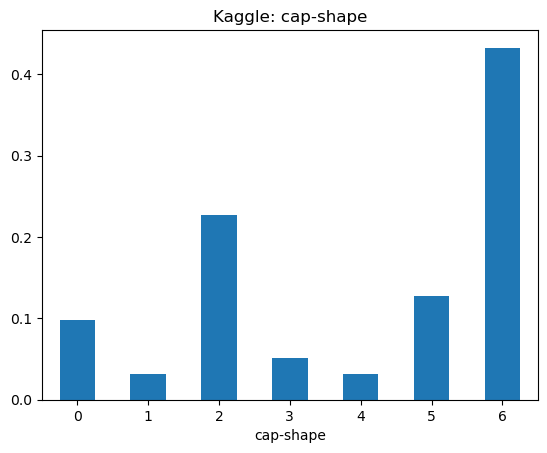

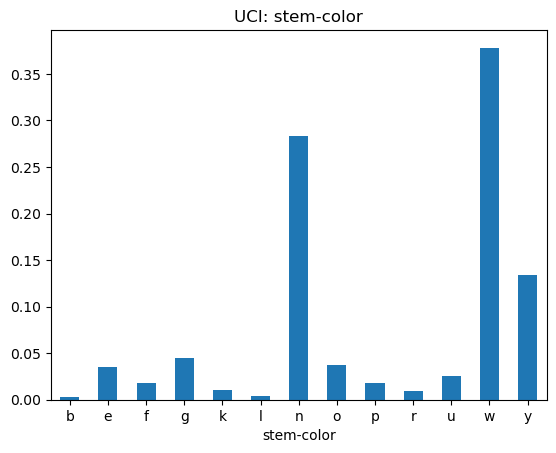

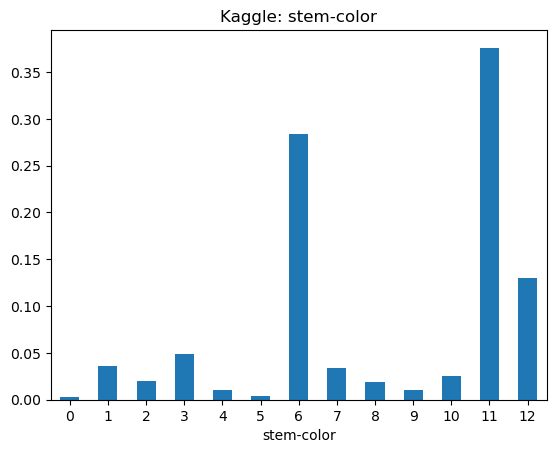

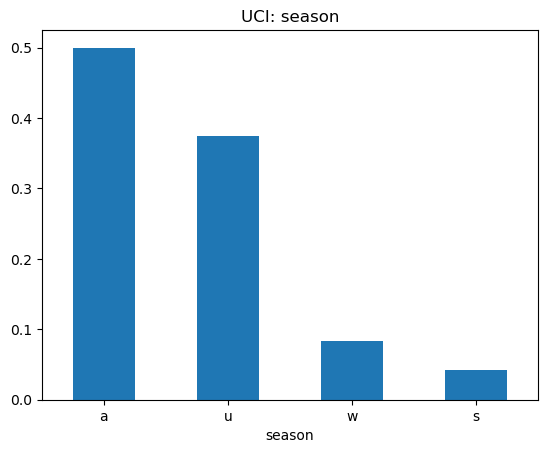

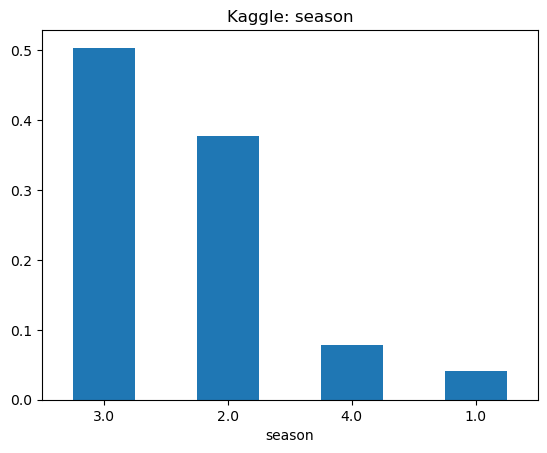

season
3.0    0.503563
2.0    0.377292
4.0    0.078079
1.0    0.041066
Name: proportion, dtype: float64

In [ ]:
strange_features = ['gill-color', 'gill-attachment', 'cap-shape', 'stem-color']

for feature in strange_features:
    original_df[feature].value_counts(normalize=True).sort_index().plot.bar(rot=0, title=f'UCI: {feature}')
    plt.show()
    df[feature].value_counts(normalize=True).sort_index().plot.bar(rot=0, title=f'Kaggle: {feature}')
    plt.show()


feature = 'season'
original_df[feature].value_counts(normalize=True).plot.bar(rot=0, title=f'UCI: {feature}')
plt.show()
season_frequencies = df[feature].value_counts(normalize=True)
season_frequencies.index = season_frequencies.index.map(lambda l : np.around(l,2))
season_frequencies.plot.bar(rot=0, title=f'Kaggle: {feature}')
plt.show()

df[feature].value_counts(normalize=True)

## 💡**Here is what each number stands for**💡
### Gill Color

| **Gill Color** | Buff | Red | None | Gray | Black | Brown | Orange | Pink | Green | Purple | White | Yellow |
|----------------|------|-----|---|------|-------|-------|--------|------|-------|--------|-------|--------|
| **Value**      | 0    | 1   | 2 | 3    | 4     | 5     | 6      | 7    | 8     | 9      | 10    | 11     |

### Stem Color

| **Stem Color** | Buff | Red | None | Gray | Black | Blue | Brown | Orange | Pink | Green | Purple | White | Yellow |
|----------------|------|-----|---|------|-------|------|-------|--------|------|-------|--------|-------|--------|
| **Value**      | 0    | 1   | 2 | 3    | 4     | 5    | 6     | 7      | 8    | 9     | 10     | 11    | 12     |

### Cap Shape

| **Cap Shape** | Bell | Conical | Flat | Others | Spherical | Sunken | Convex |
|---------------|------|---------|------|--------|-----------|--------|--------|
| **Value**     | 0    | 1       | 2    | 3      | 4         | 5      | 6      |

### Gill Attachment

| **Gill Attachment** | Adnate | Decurrent | Free | None | Pores | Sinuate | Adnexed |
|---------------------|--------|-----------|------|------|-------|---------|---------|
| **Value**           | 0      | 1         | 2    | 3    | 4     | 5       | 6       |



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


Another notable thing we found out is that since cap-diameter and stem-width have strange values (e.g. 1500), which would be unrealistic for a mushroom if it was in millimeters, we realized that in the process of data cleaning the original dataset, their values were changed to presumably cm / 100 or m / 10000.


Statistics summary again to ensure there are no missing values and all data types are correct.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


For each column, it says that we have 54035 non-null values, so we can conclude that there are no null values and every single data type is either integers or floats, so the data seems to already have been cleaned.

In [ ]:
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

Just to make sure, there are no null values in the data set

## **2.2 Data splitting**

### **2.2.1 Dataset Balance Check**

Before splitting data, we need to check whether it's a balanced data set

In [ ]:
features = df.drop(["class"], axis=1)
target = df["class"]

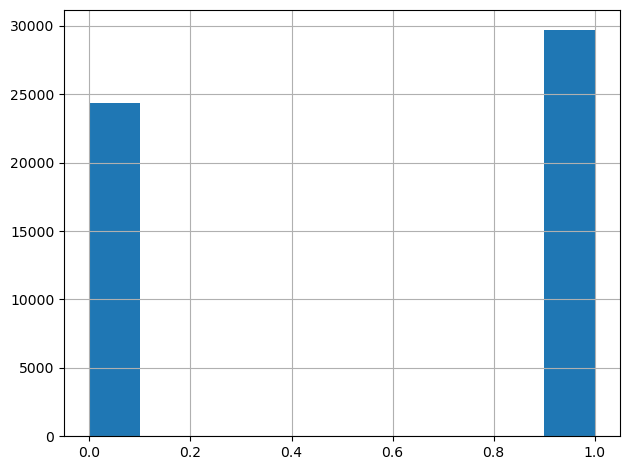

In [ ]:
target.hist()
plt.tight_layout()
plt.show()

Conclusion:

Our dataset is balanced, so accuracy is a good metric to evaluate our model. We’ll also keep an eye on other metrics like precision, recall, and F1 score to get a complete understanding of the model’s performance.

### **2.2.2 Split the data into the training and the testing set**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.15,
                                                    stratify=target,
                                                    random_state=42)

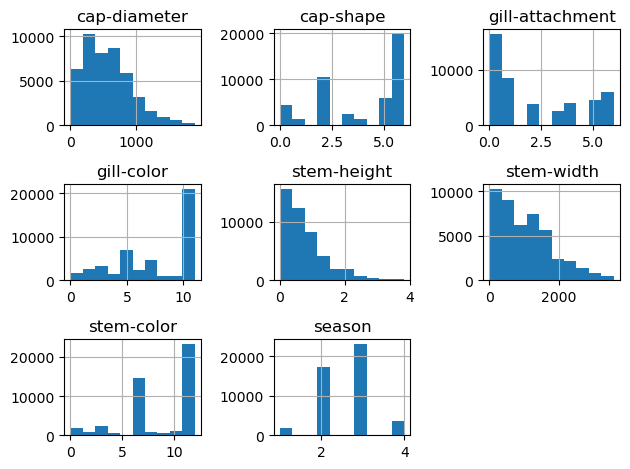

In [ ]:
X_train.hist()
plt.tight_layout()
plt.show()

In [ ]:
X_train.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
count,45929.000000,45929.000000,45929.000000,45929.000000,45929.000000,45929.000000,45929.000000,45929.000000
mean,567.422652,3.997322,2.146030,7.328659,0.759895,1051.159093,8.427508,2.618803
std,360.068137,2.161577,2.229737,3.197036,0.651769,783.220367,3.262458,0.688858
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,1.000000
25%,290.000000,2.000000,0.000000,5.000000,0.270997,420.000000,6.000000,2.000000
50%,526.000000,5.000000,1.000000,7.000000,0.596423,922.000000,11.000000,3.000000
75%,780.000000,6.000000,4.000000,10.000000,1.057985,1523.000000,11.000000,3.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,4.000000


From both the histogram and the statistical data we can conclude that:


*   **cap-diameter:** The mean of the cap-diameter is 567, however there are quite a few values that are way greater than that;
*   **cap-shape:** The majority of the mushrooms have a convex cap;
*   **gill-attachment:** The most common attachment is the adnate one;
*   **gill-color:** The most common gill color is white by a landslide;
*   **stem-height:** The height tends to be very small. There are not many outliers that have a height greater than 3;
*   **stem-width:** The width's values are mainly in the range from 0 to 1500. However, there are relatively many outliers;
*   **stem-color:** Most stems are brown and white;
*   **season:** Most mushrooms "grow" in Autumn and in Summer;

## **2.3 Exploring the relations between variables**

Since our data are all numerical datatype, we can use the Scatter Plot and heatmap to provide a quick and comprehensive view of how each variable in our dataset relates to others.

### **2.3.1 Heatmap**

A heatmap visualize a correlation matrix to show correlation coefficients between variables. The intensity of the colors represents the magnitude of the correlation, which makes it easier to understand the strength and direction strength of relationships between different variables at a glance.


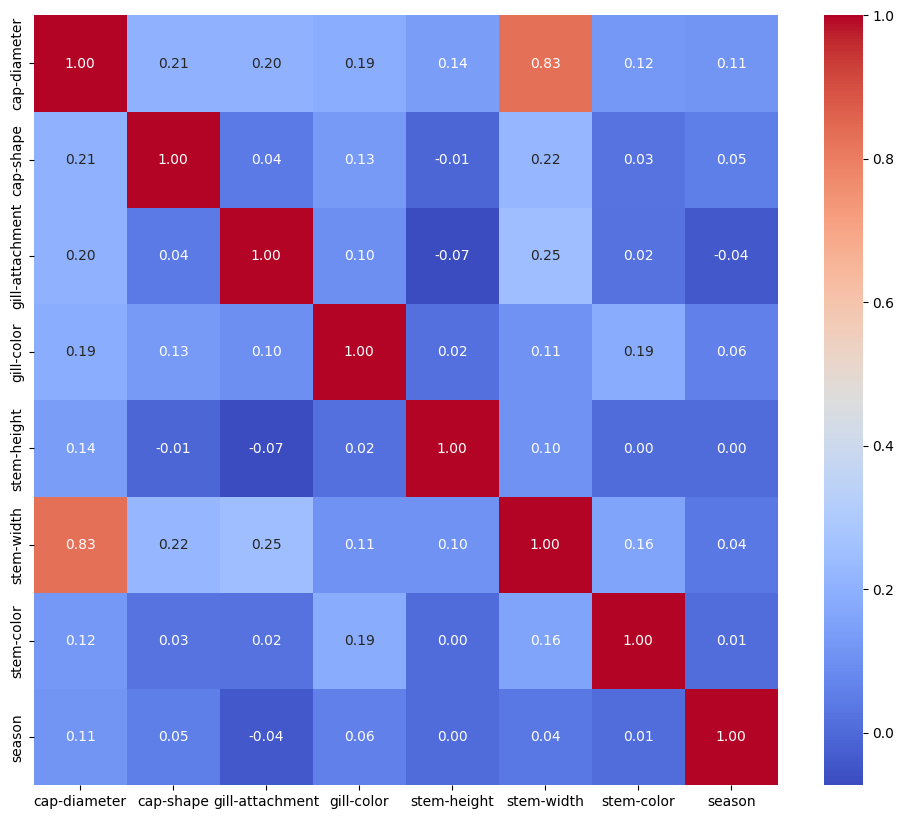

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Features don't seem not super correlated between each other except for stem width and cap diameter.

### **2.3.2 Scatter Plot**

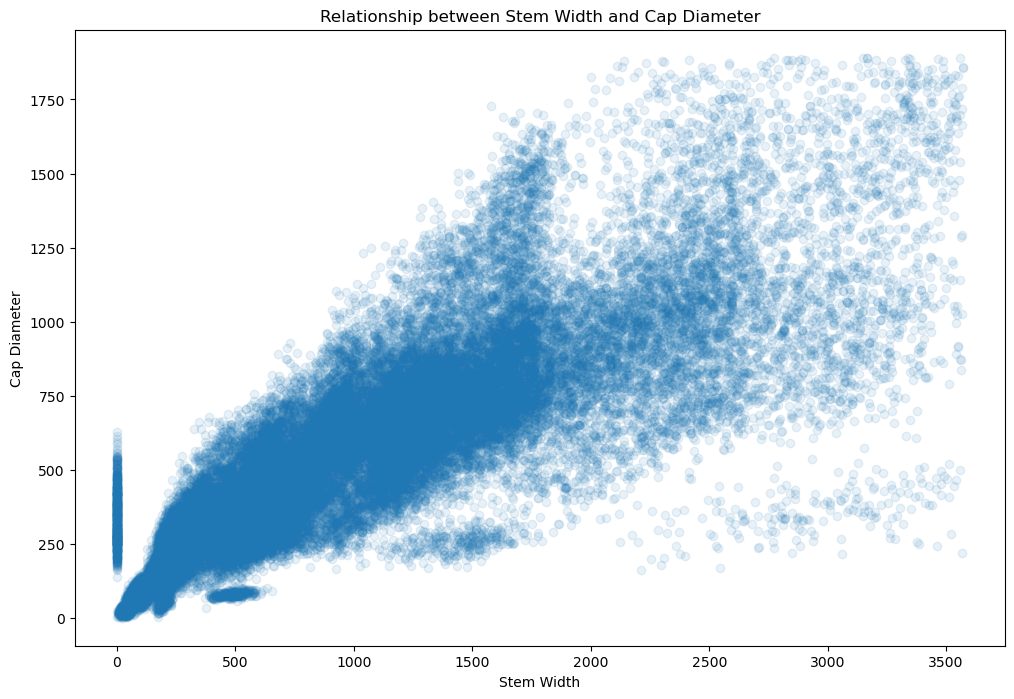

In [ ]:
%matplotlib inline
plt.figure(figsize=(12, 8))

plt.scatter(X_train['stem-width'], X_train['cap-diameter'], alpha=0.1)
plt.xlabel('Stem Width')
plt.ylabel('Cap Diameter')
plt.title('Relationship between Stem Width and Cap Diameter')
plt.show()


It seems like the bigger the stem width is, the bigger the cap is, except for some outliers that are represented here via a vertical line but hopefully that shouldn't be a huge problem for the training process.

Let's make sure that the training distribution is also balanced:

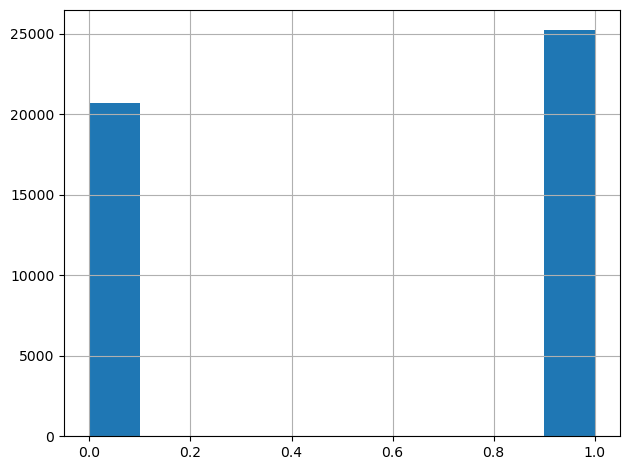

In [ ]:
y_train.hist()
plt.tight_layout()
plt.show()

## **2.4 Exploring the relations between the target and the features**

By plotting stacked bar charts, the distribution of different categories of each categorical feature within the target variable can be visualized intuitively. This helps identify potential patterns and trends, guiding subsequent feature engineering and modeling processes.







In [ ]:
feature_names = list(df.columns)[:-1]
feature_names

['cap-diameter',
 'cap-shape',
 'gill-attachment',
 'gill-color',
 'stem-height',
 'stem-width',
 'stem-color',
 'season']

In [ ]:
categorical = ["cap-shape", "gill-attachment", "gill-color", "stem-color", "season"]
numerical = ["cap-diameter", "stem-height", "stem-width"]

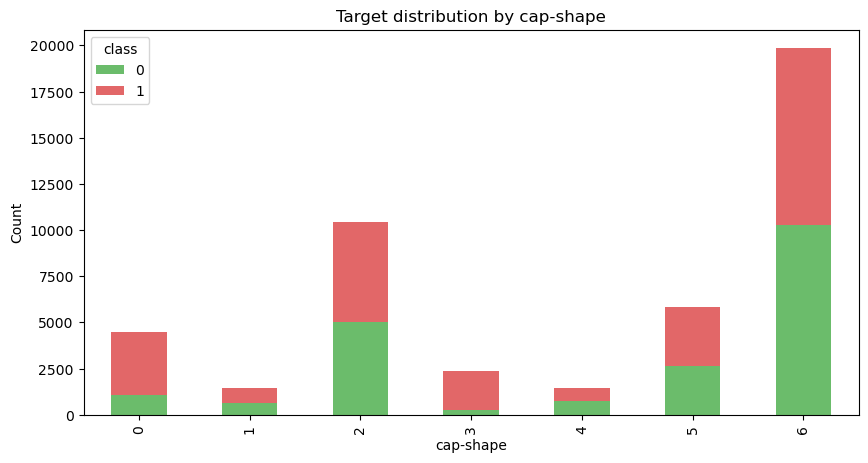

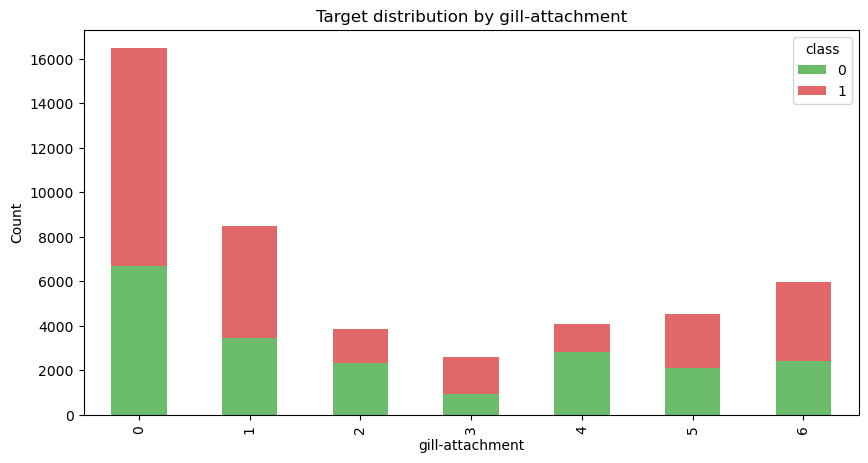

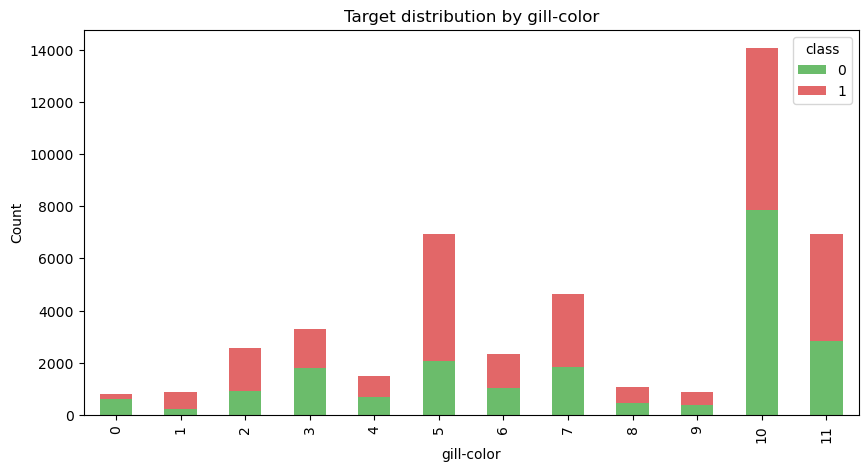

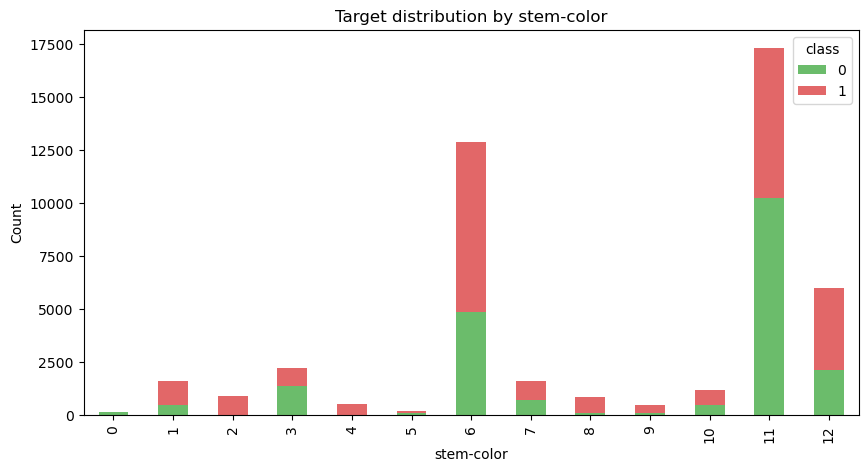

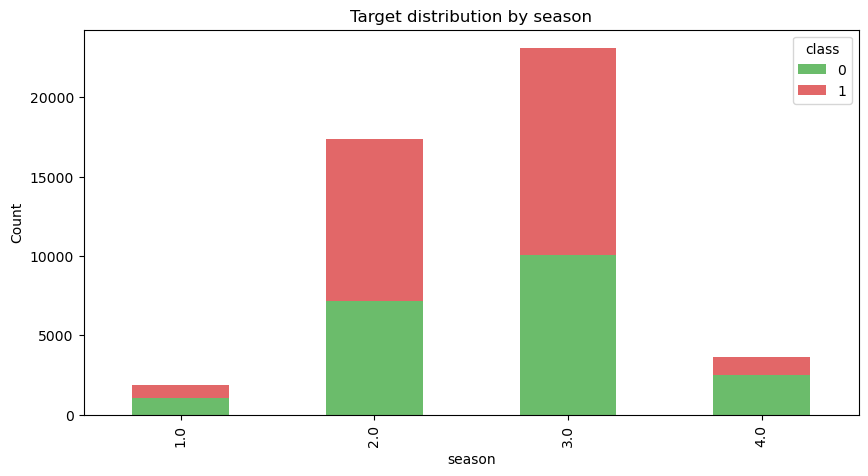

In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
colors = ['#2ca02c', '#d62728']
for feature in categorical:
    plt.figure(figsize=(10, 5))
    cross_tab = pd.crosstab(train_data[feature], y_train)
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), color=colors, alpha=0.7)
    plt.title(f'Target distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title=y_train.name)
    plt.show()

* Most mushrooms are difficult to distinguish based on their cap shape, as the proportions of poisonous and non-poisonous mushrooms with various cap shapes are nearly identical. However, most mushrooms whose cap shape is bell are poisonous;
*   Poisonous mushrooms more commonly have gill attachments adnate, decurrent or no attachments, while non-poisonous mushrooms more commonly have free gill attachments;
*   More poisonous mushrooms' gills are red, brown and pink, while non-poisonous mushrooms are typically buff;
*   A mushroom whose stem color is buff is never poisonous and all/almost all mushrooms whose stem colors are black, blue, pink and green;
*   More mushrooms "grow" in Summer and Autumn.

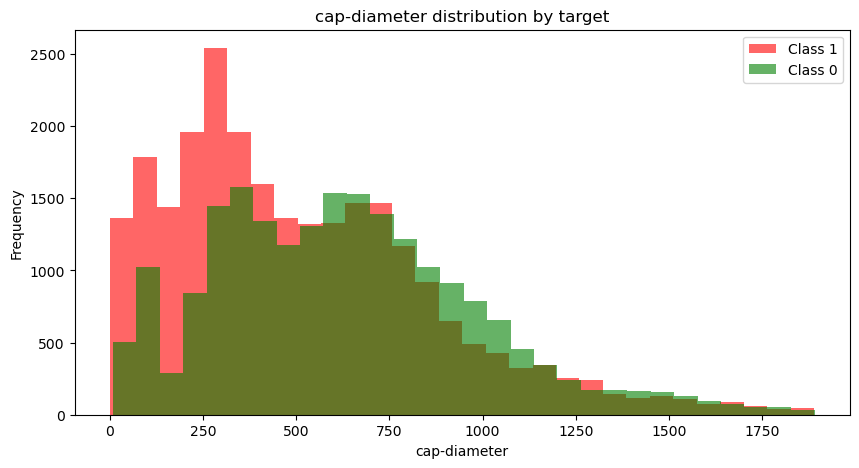

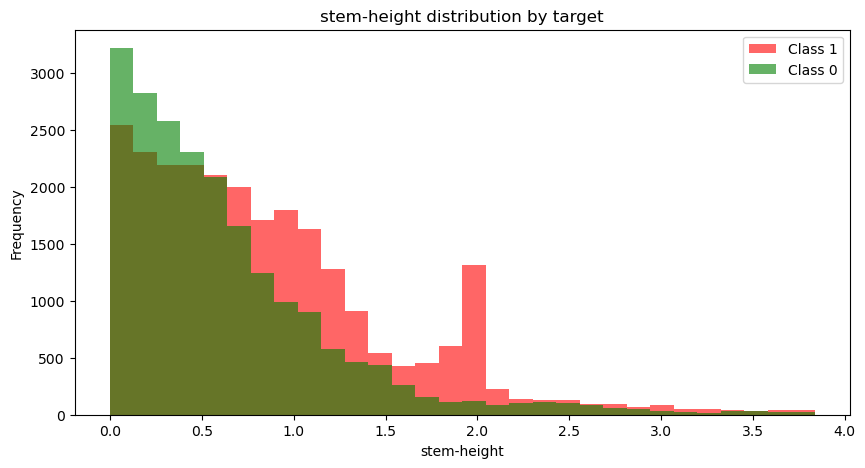

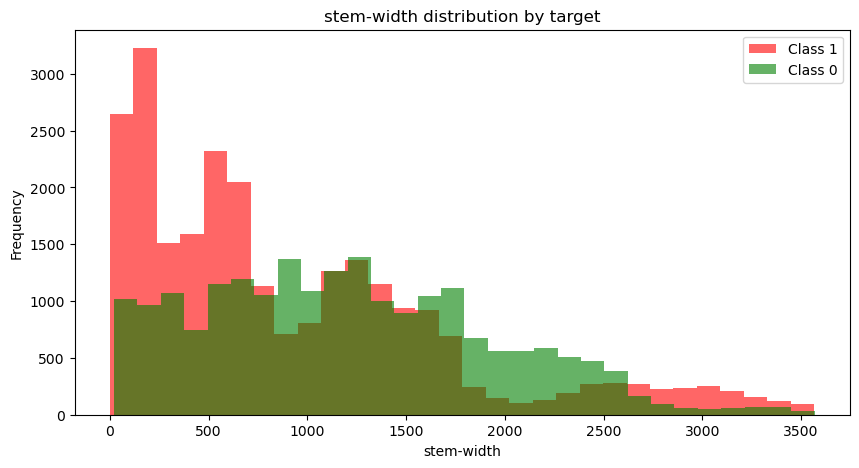

In [ ]:
colors = {0: 'green', 1: 'red'}
for feature in numerical:
    plt.figure(figsize=(10, 5))
    for target_class in train_data[y_train.name].unique():
        subset = train_data[train_data[y_train.name] == target_class]
        plt.hist(subset[feature], alpha=0.6, bins=30, label=f'Class {target_class}', color=colors[target_class])
    plt.title(f'{feature} distribution by target')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

*   Poisonous mushrooms have slightly smaller caps;
*   Mushrooms of both classes generally have similar stem heights, although poisonous mushrooms can be taller;
*   Many poisonous mushrooms have widths ranging from 100 to 600, whereas the widths of non-poisonous mushrooms are more evenly distributed;

Overall, we think that we want to apply feature engineering. In particular, since there are a lot of categorical values, we think it's a good idea to use One-Hot Encoding for them. By using One-Hot Encoding, we can represent each category in a categorical variable as a separate binary feature.

As for the continuous variables, we are thinking of applying PolynomialFeatures to them.   

We will use StandardScaler() for continuous variables and of course implement it together with One-Hot Encoding using the ColumnTransformer(). It will be interesting to compare the performance of our model with and without the scaler and One-Hot encoder.

# **3. Modelling**

For the "dirty models", we still need One-Hot Encoding for the categorical values, except for the tree-based models even though, out of interest, we want to see how much worse tree-based models perform with One-Hot Encoding in our case.
Algorithms that we will use: kNN, Logistic Regression, Decision Trees and Random Forests.

We think that training models on the whole dataset won't take too much time, so we will leave it as it is.

First we create a column transformer, to just apply OneHotEncoding to the categroical features.

In [ ]:
categorical = ["cap-shape", "gill-attachment", "gill-color", "stem-color", "season"]
numerical = ["cap-diameter", "stem-height", "stem-width"]

In [ ]:
ct = make_column_transformer((OneHotEncoder() , categorical))

## **3.1 kNN Model**

**Naive kNN implementation**

We implement kNN with the default settings, i.e. 5 neighbors and without any feature scaling to get a first feeling for the performance and to be able to compare this model to more "tuned" ones.

Cross-Validation and Training Scores:
Training Accuracy: 0.8750245017203333
Std Dev Training Accuracy: 0.001458201254608431

Validation Accuracy: 0.8726078986258823
Std Dev Validation Accuracy: 0.005361213709380971



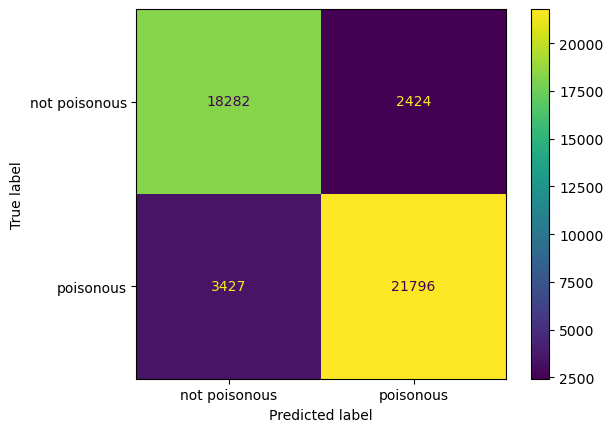

In [ ]:
pipe_naive_kNN = Pipeline([("transformer", ct),
                  ("kNN", KNeighborsClassifier())]) # 5 neighbours by default

# Perform cross-validation
cv_results = cross_validate(pipe_naive_kNN, X_train, y_train, cv=5, return_train_score=True)

# Print the training and the validation scores
print("Cross-Validation and Training Scores:")
print(f"Training Accuracy: {cv_results['train_score'].mean()}")
print(f"Std Dev Training Accuracy: {cv_results['train_score'].std()}")
print()
print(f"Validation Accuracy: {cv_results['test_score'].mean()}")
print(f"Std Dev Validation Accuracy: {cv_results['test_score'].std()}")
print()

naive_pred_kNN = cross_val_predict(pipe_naive_kNN, X_train, y_train, cv=5)
cm_naive_kNN = confusion_matrix(y_train, naive_pred_kNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_naive_kNN, display_labels=["not poisonous", "poisonous"])

disp.plot()
plt.show()

Let's write down some interpretations for TP, TN, FP, FN for this dataset to not get ourselves confused when reading confusion matrices:  
**True Positive**: The model correctly predicts that an instance is poisonous.  
**True Negative**: The model correctly predicts that an instance is non-poisonous.  
**False Positive**: The model incorrectly predicts that an instance is poisonous when it is actually non-poisonous.   
**False Negative**: The model incorrectly predicts that an instance is non-poisonous (0) when it is actually poisonous.

We obviously want to minimize False Negatives in real life because somebody would rather not eat a mushroom deemed poisonous when it's not rather than eat one that's considered edible when it's actually poisonous.  
Here, judging by this confusion matrix, we have quite a high number of False Negatives, which we want to minimize. The number of False Positives is also quite high, so there is definetely room for improvement!

In [ ]:
# Cross-validation metrics
naive_kNN_recall= recall_score(y_train, naive_pred_kNN)
naive_kNN_specificity = recall_score(y_train, naive_pred_kNN, pos_label=0)
naive_kNN_precision = precision_score(y_train, naive_pred_kNN)
naive_kNN_f1 = f1_score(y_train, naive_pred_kNN)

print(f"{naive_kNN_recall=}")
print(f"{naive_kNN_specificity=}")
print(f"{naive_kNN_precision=}")
print(f"{naive_kNN_f1=}")

naive_kNN_recall=0.8641319430678349
naive_kNN_specificity=0.8829324833381629
naive_kNN_precision=0.8999174236168456
naive_kNN_f1=0.8816617114657282


It is a pretty good result considering that we didn't implement any scaling or hyperparameter search, however, this is not good enough for real-life application.

Now, let's implement **kNN with scaling** for the continuous features



In [ ]:
ct_with_scaler = make_column_transformer((OneHotEncoder() , categorical),
                                        (StandardScaler(), numerical)) # new transformer with scaling and one-hot encoding

Cross-Validation and Training Scores:
Training Accuracy: 0.991704587396019
Std Dev Training Accuracy: 0.00026240956094775733

Validation Accuracy: 0.9885475578147191
Std Dev Validation Accuracy: 0.0014691409224129462



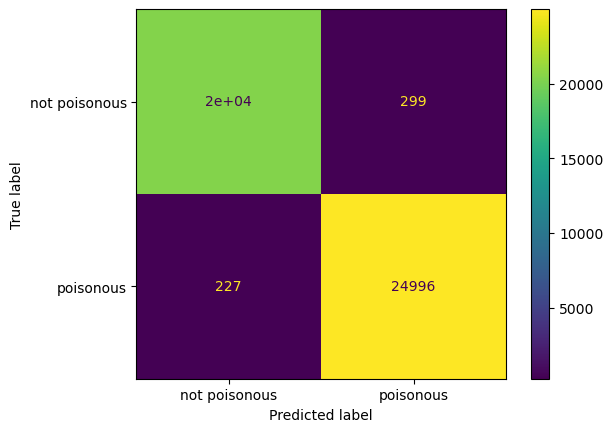

In [ ]:
pipe_scaler_kNN = Pipeline(steps=[("transformer", ct_with_scaler),
                  ("kNN", KNeighborsClassifier())]) # 5 neighbours by default

# Perform cross-validation
cv_results = cross_validate(pipe_scaler_kNN, X_train, y_train, cv=5, return_train_score=True)

# Print the training and the validation scores
print("Cross-Validation and Training Scores:")
print(f"Training Accuracy: {cv_results['train_score'].mean()}")
print(f"Std Dev Training Accuracy: {cv_results['train_score'].std()}")
print()
print(f"Validation Accuracy: {cv_results['test_score'].mean()}")
print(f"Std Dev Validation Accuracy: {cv_results['test_score'].std()}")
print()


scaler_pred_kNN = cross_val_predict(pipe_scaler_kNN, X_train, y_train, cv=5)
cm_scaler_kNN = confusion_matrix(y_train, scaler_pred_kNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_scaler_kNN, display_labels=["not poisonous", "poisonous"])

disp.plot()
plt.show()

We can see that the performance increased quite drastically which makes sense because all OneHotEncoded categorial features are 0 or 1 and stem height is also under 4.0 but cap diameter and stem width go up to 2000 and even 4000 respectively (stem height likely in cm and the other two in mm) so the features are on vastly different scales.
In general, the performance of kNN with Standard Scalar is really good!

In [ ]:
# Cross-validation metrics
scaler_kNN_recall= recall_score(y_train, scaler_pred_kNN)
scaler_kNN_specificity = recall_score(y_train, scaler_pred_kNN, pos_label=0)
scaler_kNN_precision = precision_score(y_train, scaler_pred_kNN)
scaler_kNN_f1 = f1_score(y_train, scaler_pred_kNN)

print(f"{scaler_kNN_recall=}")
print(f"{scaler_kNN_specificity=}")
print(f"{scaler_kNN_precision=}")
print(f"{scaler_kNN_f1=}")

scaler_kNN_recall=0.9910002775244816
scaler_kNN_specificity=0.9855597411378344
scaler_kNN_precision=0.9881794821110892
scaler_kNN_f1=0.9895878696702166


The recall has significantly improved (!!!) along with the other metrics. However, let's try to apply **Polynomial Features** as well and see if adding new features will make the performance even better.

In [ ]:
ct_with_scaler_poly = make_column_transformer((OneHotEncoder() , categorical),
                                              (PolynomialFeatures(degree=2, include_bias=False), numerical),
                                              (StandardScaler(), numerical)
                                              ) # degree=2 is the default one

Cross-Validation and Training Scores:
Training Accuracy: 0.7706242157270371
Std Dev Training Accuracy: 0.0016289886843288076

Validation Accuracy: 0.6584510167361969
Std Dev Validation Accuracy: 0.005902593850650481



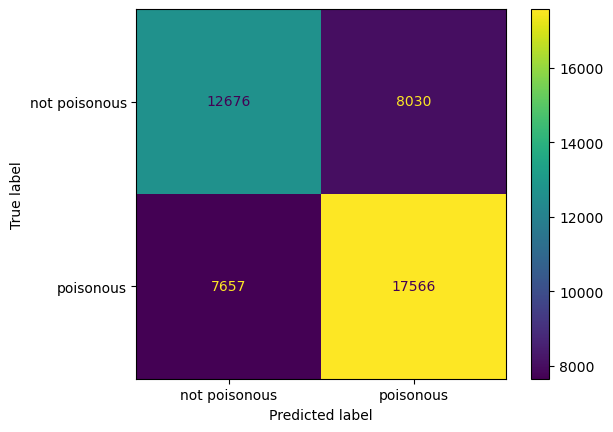

In [ ]:
# Define a pipeline
pipe_scaler_poly_kNN = Pipeline([("transformer", ct_with_scaler_poly),
                  ("kNN", KNeighborsClassifier())]) # 5 neighbours by default

# Perform cross-validation
cv_results = cross_validate(pipe_scaler_poly_kNN, X_train, y_train, cv=5, return_train_score=True)

# Print the training and the validation scores
print("Cross-Validation and Training Scores:")
print(f"Training Accuracy: {cv_results['train_score'].mean()}")
print(f"Std Dev Training Accuracy: {cv_results['train_score'].std()}")
print()
print(f"Validation Accuracy: {cv_results['test_score'].mean()}")
print(f"Std Dev Validation Accuracy: {cv_results['test_score'].std()}")
print()


# Plot the confusion matrix
scaler_poly_pred_kNN = cross_val_predict(pipe_scaler_poly_kNN, X_train, y_train, cv=5)
cm_scaler_poly_kNN = confusion_matrix(y_train, scaler_poly_pred_kNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_scaler_poly_kNN, display_labels=["not poisonous", "poisonous"])

disp.plot()
plt.show()

The performance of this model is way worse; but we can figure out if it's a case of overfitting.  
Training scores are better than the cross-validation scores, which proves that this is indeed the case of overfitting, so there is no point in using Polynomial Features for this kNN model.

Later on, we will find the best number k of neighbors for this model. But now we will implement other simple models.

## **3.2 Logistic Regression Model**

**Naive Logistic Regression**

Cross-validation accuracy scores:  [0.7155454  0.70553015 0.71260614 0.7189201  0.72019597]
Mean cross-validation accuracy: 0.7146
Standard deviation of cross-validation accuracy: 0.0052

Cross-validation log loss scores:  [0.54760465 0.5546459  0.55245307 0.54148082 0.54363115]
Mean cross-validation log loss: 0.5480
Standard deviation of cross-validation log loss: 0.0050

Training accuracy scores:  [0.7156193  0.71749721 0.7162997  0.71453066 0.71355868]
Mean training accuracy: 0.7155
Standard deviation of training accuracy: 0.0014



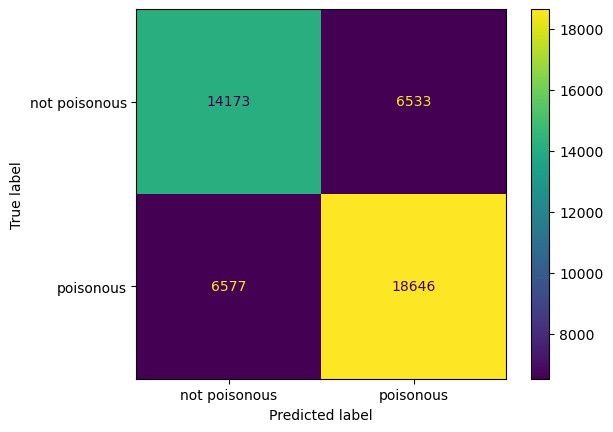

In [ ]:
# Define a pipeline
pipe_naive_log_reg = Pipeline([("transformer", ct),
                  ("log_reg", LogisticRegression(max_iter=1_000, penalty=None))]) # penalty=None because by default it implements regularization

scoring = ['accuracy', 'neg_log_loss']

cv_results_naive_log_reg = cross_validate(pipe_naive_log_reg, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Extract validation scores
accuracy_scores_naive_log_reg = cv_results_naive_log_reg['test_accuracy']
log_loss_scores_naive_log_reg = -cv_results_naive_log_reg['test_neg_log_loss']

# Extract training scores
train_accuracy_scores_naive_log_reg = cv_results_naive_log_reg['train_accuracy']
train_log_loss_scores_naive_log_reg = -cv_results_naive_log_reg['train_neg_log_loss']


# Print cross-validation accuracy scores
print("Cross-validation accuracy scores: ", accuracy_scores_naive_log_reg)
print(f"Mean cross-validation accuracy: {np.mean(accuracy_scores_naive_log_reg):.4f}")
print(f"Standard deviation of cross-validation accuracy: {np.std(accuracy_scores_naive_log_reg):.4f}")
print()
# Print cross-validation log loss scores
print("Cross-validation log loss scores: ", log_loss_scores_naive_log_reg)
print(f"Mean cross-validation log loss: {np.mean(log_loss_scores_naive_log_reg):.4f}")
print(f"Standard deviation of cross-validation log loss: {np.std(log_loss_scores_naive_log_reg):.4f}")
print()
# Print training accuracy scores
print("Training accuracy scores: ", train_accuracy_scores_naive_log_reg)
print(f"Mean training accuracy: {np.mean(train_accuracy_scores_naive_log_reg):.4f}")
print(f"Standard deviation of training accuracy: {np.std(train_accuracy_scores_naive_log_reg):.4f}")
print()

# Plot the confusion matrix
pred_naive_log_reg = cross_val_predict(pipe_naive_log_reg, X_train, y_train, cv=5)
cm_scaler_naive_log_reg = confusion_matrix(y_train, pred_naive_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_scaler_naive_log_reg, display_labels=["not poisonous", "poisonous"])

disp.plot()
plt.show()

In [ ]:
# Cross-validation metrics
naive_log_reg_recall = recall_score(y_train, pred_naive_log_reg)
naive_log_reg_specificity = recall_score(y_train, pred_naive_log_reg, pos_label=0)
naive_log_reg_precision = precision_score(y_train, pred_naive_log_reg)
naive_log_reg_f1 = f1_score(y_train, pred_naive_log_reg)

print(f"{naive_log_reg_recall=}")
print(f"{naive_log_reg_specificity=}")
print(f"{naive_log_reg_precision=}")
print(f"{naive_log_reg_f1=}")

naive_log_reg_recall=0.7392459263370733
naive_log_reg_specificity=0.6844875881387038
naive_log_reg_precision=0.7405377497120617
naive_log_reg_f1=0.7398912741557875


In [ ]:
# Fit the training set
pipe_naive_log_reg.fit(X_train, y_train)

# Predict on the training set
y_train_pred = pipe_naive_log_reg.predict(X_train)

# Calculate training metrics
train_precision = precision_score(y_train, y_train_pred)
train_specificity = recall_score(y_train, y_train_pred, pos_label=0)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print(f"Training Recall: {train_recall:.2f}")
print(f"Training Specificity: {train_specificity:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training F1 Score: {train_f1:.2f}")

Training Recall: 0.74
Training Specificity: 0.69
Training Precision: 0.74
Training F1 Score: 0.74


Somehow, the naive Logistic Regression model performs way worse than the kNN one but we will see if it gets improved the more we try to tune it.

Cross-validation accuracy scores:  [0.74907468 0.74297845 0.74265186 0.75691269 0.75046271]
Mean cross-validation accuracy: 0.7484
Standard deviation of cross-validation accuracy: 0.0053

Cross-validation log loss scores:  [0.52352358 0.52790722 0.52695565 0.51444527 0.51807174]
Mean cross-validation log loss: 0.5222
Standard deviation of cross-validation log loss: 0.0052

Training accuracy scores:  [0.74917671 0.74974825 0.74974825 0.74697221 0.74970063]
Mean training accuracy: 0.7491
Standard deviation of training accuracy: 0.0011



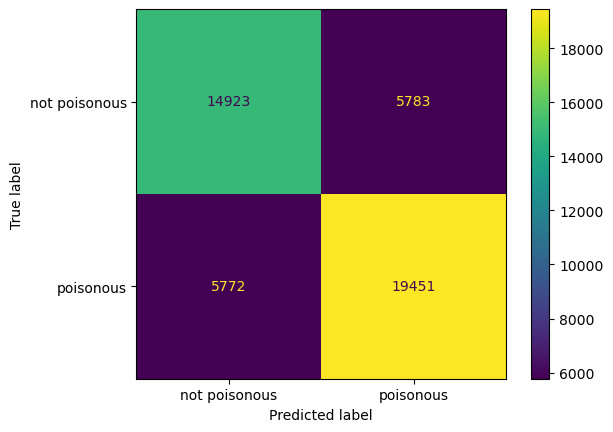

In [ ]:
# Define a pipeline
pipe_scaler_log_reg = Pipeline([("transformer", ct_with_scaler),
                  ("log_reg", LogisticRegression(max_iter=1_000, penalty=None))])

cv_results_scaler_log_reg = cross_validate(pipe_scaler_log_reg, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Extract scores
accuracy_scores_scaler_log_reg = cv_results_scaler_log_reg['test_accuracy']
log_loss_scores_scaler_log_reg = -cv_results_scaler_log_reg['test_neg_log_loss']
# Extract training scores
train_accuracy_scores_scaler_log_reg = cv_results_scaler_log_reg['train_accuracy']
train_log_loss_scores_scaler_log_reg = -cv_results_scaler_log_reg['train_neg_log_loss']

# Print cross-validation accuracy scores
print("Cross-validation accuracy scores: ", accuracy_scores_scaler_log_reg)
print(f"Mean cross-validation accuracy: {np.mean(accuracy_scores_scaler_log_reg):.4f}")
print(f"Standard deviation of cross-validation accuracy: {np.std(accuracy_scores_scaler_log_reg):.4f}")
print()
# Print cross-validation log loss scores
print("Cross-validation log loss scores: ", log_loss_scores_scaler_log_reg)
print(f"Mean cross-validation log loss: {np.mean(log_loss_scores_scaler_log_reg):.4f}")
print(f"Standard deviation of cross-validation log loss: {np.std(log_loss_scores_scaler_log_reg):.4f}")
print()
# Print training accuracy scores
print("Training accuracy scores: ", train_accuracy_scores_scaler_log_reg)
print(f"Mean training accuracy: {np.mean(train_accuracy_scores_scaler_log_reg):.4f}")
print(f"Standard deviation of training accuracy: {np.std(train_accuracy_scores_scaler_log_reg):.4f}")
print()
# Plot the confusion matrix
scaler_pred_log_reg = cross_val_predict(pipe_scaler_log_reg, X_train, y_train, cv=5)
cm_scaler_log_reg = confusion_matrix(y_train, scaler_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_scaler_log_reg, display_labels=["not poisonous", "poisonous"])

disp.plot()
plt.show()

In [ ]:
# Cross-validation metrics
scaler_log_reg_recall = recall_score(y_train, scaler_pred_log_reg)
scaler_log_reg_specificity = recall_score(y_train, scaler_pred_log_reg, pos_label=0)
scaler_log_reg_precision = precision_score(y_train, scaler_pred_log_reg)
scaler_log_reg_f1 = f1_score(y_train, scaler_pred_log_reg)

print(f"{scaler_log_reg_recall=}")
print(f"{scaler_log_reg_specificity=}")
print(f"{scaler_log_reg_precision=}")
print(f"{scaler_log_reg_f1=}")

scaler_log_reg_recall=0.7711612417238235
scaler_log_reg_specificity=0.7207089732444703
scaler_log_reg_precision=0.7708250772766901
scaler_log_reg_f1=0.7709931228570862


In [ ]:
# Fit the training set
pipe_scaler_log_reg.fit(X_train, y_train)

# Predict on the training set
y_train_pred = pipe_scaler_log_reg.predict(X_train)

# Calculate training metrics
train_precision = precision_score(y_train, y_train_pred)
train_specificity = recall_score(y_train, y_train_pred, pos_label=0)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print(f"Training Recall: {train_recall:.2f}")
print(f"Training Specificity: {train_specificity:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training F1 Score: {train_f1:.2f}")

Training Recall: 0.77
Training Specificity: 0.72
Training Precision: 0.77
Training F1 Score: 0.77


This model performs better with scaling. Let's plot the most important features that influence the decision of the model and the least important ones by comparing coefficients:

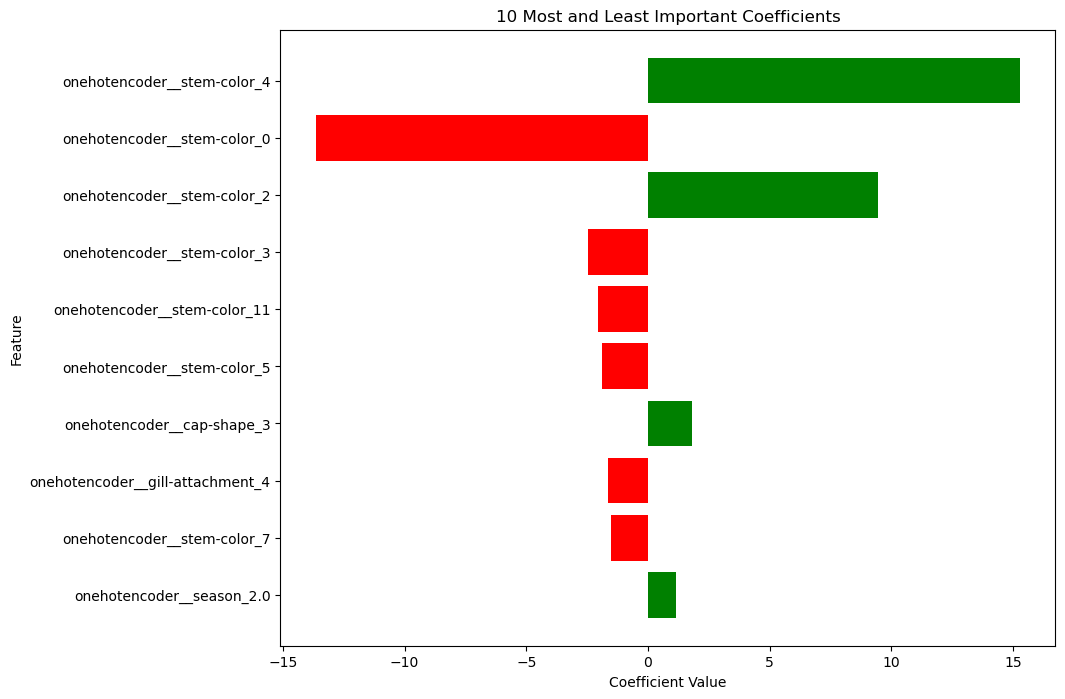

In [ ]:
log_reg_scaler_model = pipe_scaler_log_reg.named_steps["log_reg"]

# Get the feature names from the ColumnTransformer
feature_names_scaler = pipe_scaler_log_reg.named_steps["transformer"].get_feature_names_out()

# Get the coefficients
coefficients_scaler = log_reg_scaler_model.coef_[0]

# Create a DataFrame for the coefficients
coef_df_scaler = pd.DataFrame({
    'Feature': feature_names_scaler,
    'Coefficient': coefficients_scaler
})

# Sort the DataFrame by absolute value of the coefficients (because we want 10 most and least important coefficients together)
coef_df_scaler['abs_coefficient'] = coef_df_scaler['Coefficient'].abs()
coef_df_scaler = coef_df_scaler.sort_values(by='abs_coefficient', ascending=False)

# Select the top 10 most and least important coefficients
top_n = 10
top_coef_df = coef_df_scaler.head(top_n)
bottom_coef_df = coef_df_scaler.tail(top_n)
unique_coef_df = pd.concat([top_coef_df, bottom_coef_df]).drop_duplicates()

# Plot the coefficients
plt.figure(figsize=(10, 8))
plt.barh(top_coef_df['Feature'], top_coef_df['Coefficient'], color=np.where(top_coef_df['Coefficient'] > 0, 'g', 'r'))
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('10 Most and Least Important Coefficients')
plt.gca().invert_yaxis()
plt.show()

We can see that mushrooms that have stem color 4 and 2 are way more likely to be marked as poisonous, which corresponds to what we saw on the graphs with relationships. And mushrooms whose stem color is 0 are likely to be identified as non-poisonous, which is also a true correlation looking at the graph: no poisonous mushroom has a stem of color 0.

Let's now apply **Polynomial Features** to Logistic Regression:

Cross-validation accuracy scores:  [0.60341825 0.6077727  0.59895493 0.60809928 0.60881873]
Mean cross-validation accuracy: 0.6054
Standard deviation of cross-validation accuracy: 0.0037

Cross-validation log loss scores:  [0.68551187 0.68593673 0.68596965 0.685513   0.68503088]
Mean cross-validation log loss: 0.6856
Standard deviation of cross-validation log loss: 0.0003

Training accuracy scores:  [0.60395177 0.60261819 0.60533979 0.60827913 0.60731004]
Mean training accuracy: 0.6055
Standard deviation of training accuracy: 0.0021



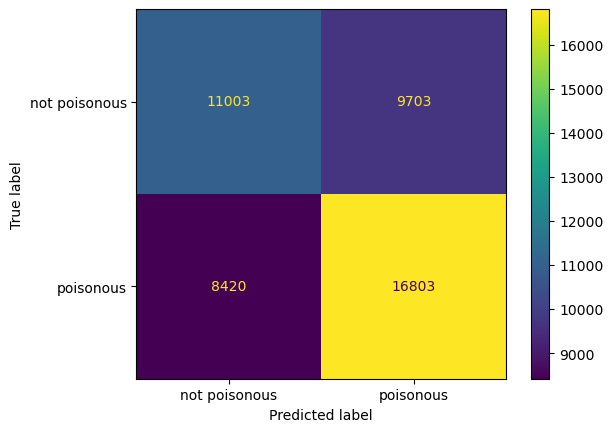

In [ ]:
# Define a pipeline
pipe_scaler_poly_log_reg = Pipeline([("transformer", ct_with_scaler_poly),
                  ("log_reg", LogisticRegression(max_iter=1_000, penalty=None))])

cv_results = cross_validate(pipe_scaler_poly_log_reg, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Extract scores
accuracy_scores_poly = cv_results['test_accuracy']
log_loss_scores_poly = -cv_results['test_neg_log_loss']

# Extract training scores
train_accuracy_scores_poly = cv_results['train_accuracy']
train_log_loss_scores_poly = -cv_results['train_neg_log_loss']

# Print cross-validation accuracy scores
print("Cross-validation accuracy scores: ", accuracy_scores_poly)
print(f"Mean cross-validation accuracy: {np.mean(accuracy_scores_poly):.4f}")
print(f"Standard deviation of cross-validation accuracy: {np.std(accuracy_scores_poly):.4f}")

print()
# Print cross-validation log loss scores
print("Cross-validation log loss scores: ", log_loss_scores_poly)
print(f"Mean cross-validation log loss: {np.mean(log_loss_scores_poly):.4f}")
print(f"Standard deviation of cross-validation log loss: {np.std(log_loss_scores_poly):.4f}")
print()
# Print training accuracy scores
print("Training accuracy scores: ", train_accuracy_scores_poly)
print(f"Mean training accuracy: {np.mean(train_accuracy_scores_poly):.4f}")
print(f"Standard deviation of training accuracy: {np.std(train_accuracy_scores_poly):.4f}")
print()
# Plot the confusion matrix
scaler_poly_pred_log_reg = cross_val_predict(pipe_scaler_poly_log_reg, X_train, y_train, cv=5)
cm_poly_log_reg = confusion_matrix(y_train, scaler_poly_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_poly_log_reg, display_labels=["not poisonous", "poisonous"])

disp.plot()
plt.show()

Somehow, the training accuracy is worse than the cross-validation accuracy, so we don't really understand why that's the case.

In [ ]:
# Cross-validation metrics
scaler_poly_log_reg_recall = recall_score(y_train, scaler_poly_pred_log_reg)
scaler_poly_log_reg_specificity = recall_score(y_train, scaler_poly_pred_log_reg, pos_label=0)
scaler_poly_log_reg_precision = precision_score(y_train, scaler_poly_pred_log_reg)
scaler_poly_log_reg_f1 = f1_score(y_train, scaler_poly_pred_log_reg)

print(f"{scaler_poly_log_reg_recall=}")
print(f"{scaler_poly_log_reg_specificity=}")
print(f"{scaler_poly_log_reg_precision=}")
print(f"{scaler_poly_log_reg_f1=}")

scaler_poly_log_reg_recall=0.6661776949609484
scaler_poly_log_reg_specificity=0.5313918670916643
scaler_poly_log_reg_precision=0.6339319399381272
scaler_poly_log_reg_f1=0.6496549324363511


Let's try to plot the most/least important coefficients here as well

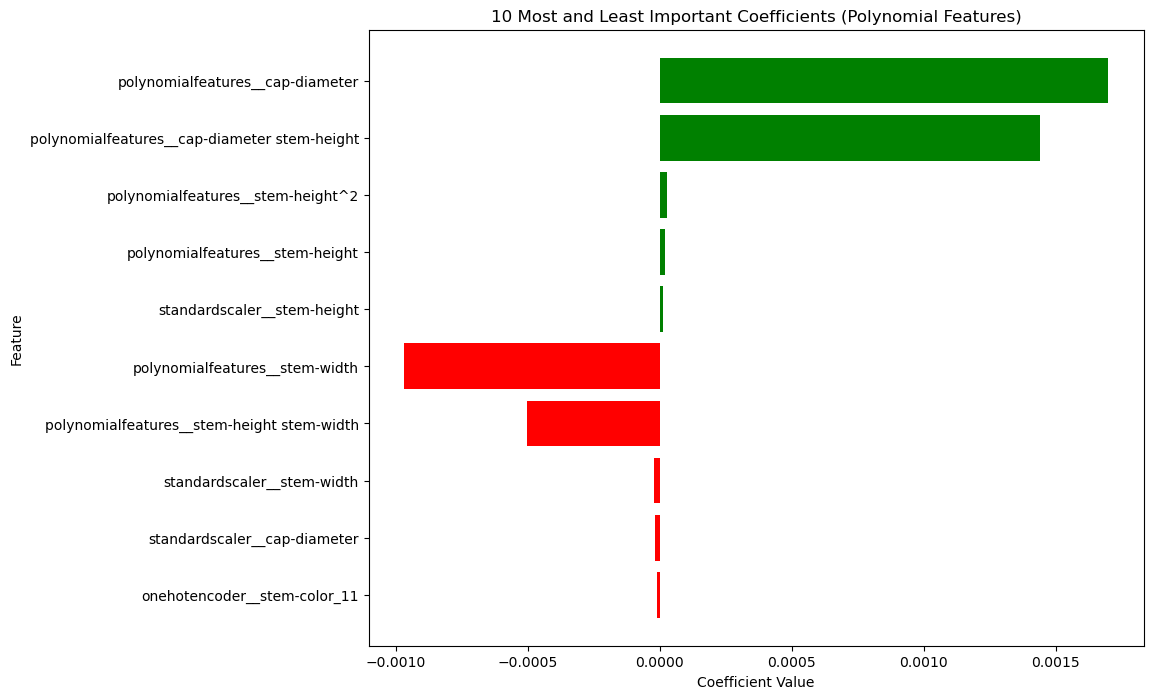

In [ ]:
pipe_scaler_poly_log_reg.fit(X_train, y_train)
log_reg_poly_model = pipe_scaler_poly_log_reg.named_steps["log_reg"]

# Get the feature names from the ColumnTransformer
feature_names_poly = pipe_scaler_poly_log_reg.named_steps["transformer"].get_feature_names_out()

# Get the coefficients
coefficients_poly = log_reg_poly_model.coef_[0]

# Create a DataFrame for the coefficients
coef_df_poly = pd.DataFrame({
    'Feature': feature_names_poly,
    'Coefficient': coefficients_poly
})

# Sort the DataFrame by absolute value of the coefficients (because we want 10 most and least important coefficients together)
coef_df_poly['abs_coefficient'] = coef_df_poly['Coefficient'].abs()
coef_df_poly = coef_df_poly.sort_values(by='abs_coefficient', ascending=False)

# Select the top 10 most and least important coefficients without overlap
top_n = 5
top_coef_df_poly = coef_df_poly.nlargest(top_n, 'Coefficient')
bottom_coef_df_poly = coef_df_poly.nsmallest(top_n, 'Coefficient')

# Combine the top and bottom coefficients
combined_coef_df_poly = pd.concat([top_coef_df_poly, bottom_coef_df_poly]).drop_duplicates()

# Plot the coefficients
plt.figure(figsize=(10, 8))
plt.barh(combined_coef_df_poly['Feature'], combined_coef_df_poly['Coefficient'], color=np.where(combined_coef_df_poly['Coefficient'] > 0, 'g', 'r'))
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('10 Most and Least Important Coefficients (Polynomial Features)')
plt.gca().invert_yaxis()
plt.show()

The only explanation to what is happening here that we can come up with is that PolynomialFeatures() obviously applies only to continuous values and maybe there is not enough correlation between those, so it found connections that actually don't exist in this dataset.

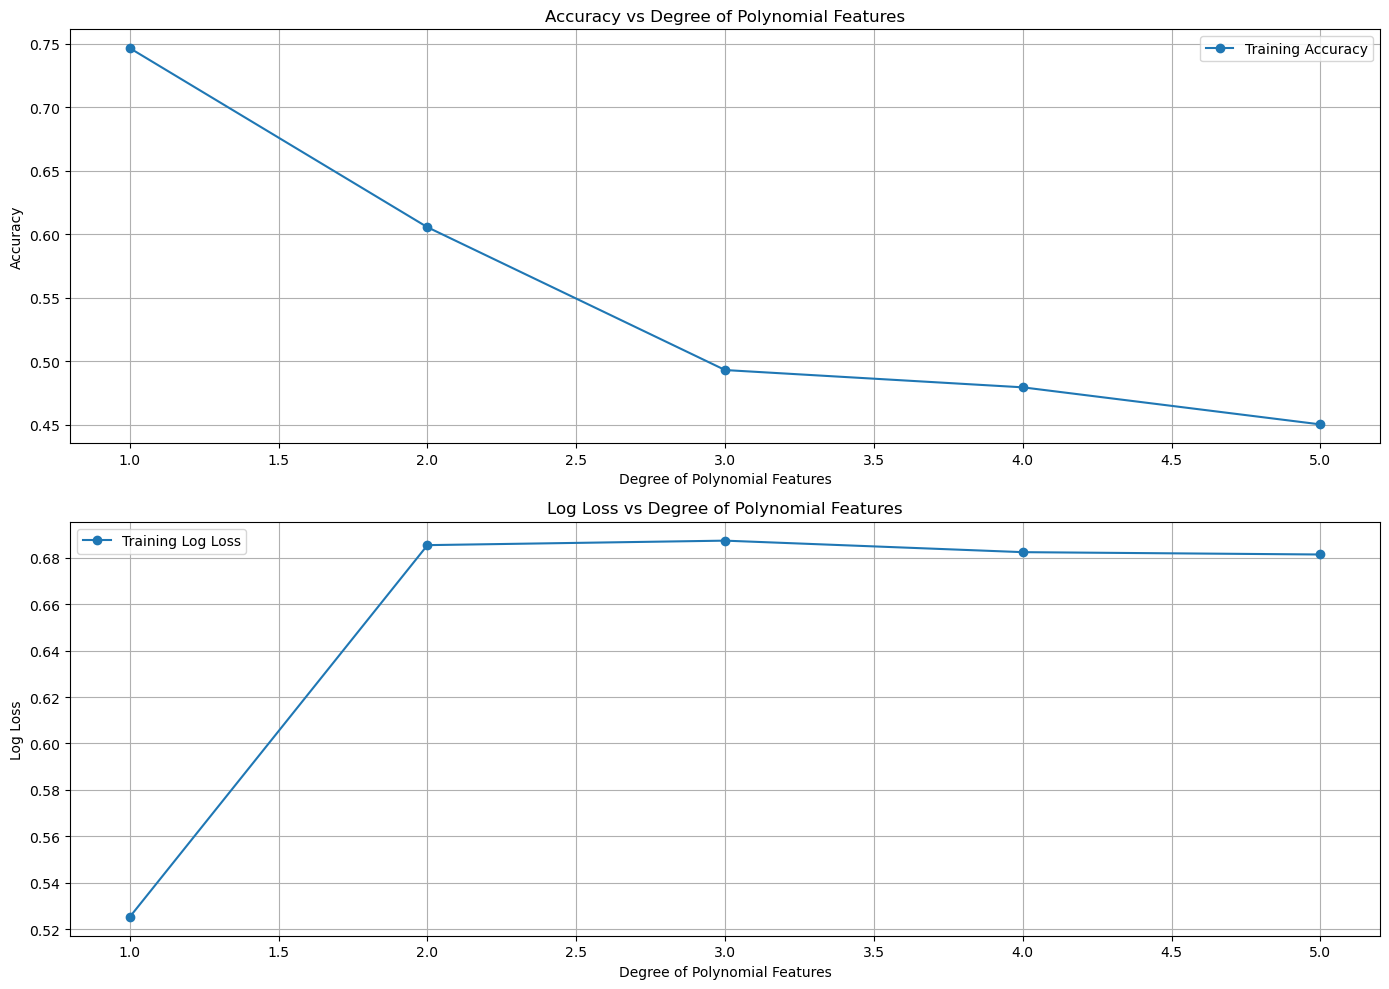

In [ ]:
# Define the range of degrees for polynomial features
degrees = range(1, 6)

# Initialize lists
train_accuracies = []
train_log_losses = []

# Define the scoring metrics
scoring = ['accuracy', 'neg_log_loss']
for degree in degrees:
    # Create the column transformer for each degree
    ct_with_scaler_poly = make_column_transformer(
        (OneHotEncoder(), categorical),
        (PolynomialFeatures(degree=degree, include_bias=False), numerical),
        (StandardScaler(), numerical)

    )

    # Create the pipeline with logistic regression
    pipe_scaler_poly_log_reg = Pipeline([
        ("transformer", ct_with_scaler_poly),
        ("log_reg", LogisticRegression(max_iter=10000, penalty=None))
    ])

    # Perform cross-validation with return_train_score=True
    cv_results = cross_validate(pipe_scaler_poly_log_reg, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

    # Store the results
    train_accuracies.append(cv_results['train_accuracy'].mean())
    train_log_losses.append(-cv_results['train_neg_log_loss'].mean())

# Plot the results
plt.figure(figsize=(14, 10))

# Plot accuracy
plt.subplot(2, 1, 1)
plt.plot(degrees, train_accuracies, marker='o', linestyle='-', label='Training Accuracy')
plt.xlabel('Degree of Polynomial Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Degree of Polynomial Features')
plt.legend()
plt.grid()

# Plot log loss
plt.subplot(2, 1, 2)
plt.plot(degrees, train_log_losses, marker='o', linestyle='-', label='Training Log Loss')
plt.xlabel('Degree of Polynomial Features')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Degree of Polynomial Features')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

The most surprising thing about our model training is probably this graph that goes against logic about Polynomial Features. As it can be seen here, the higher the degree of PolynomialFeatures is, the worse the Log Loss. It doesn't really make sense to us why that's the case but we move on and decide against using Polynomial Features for our Logistic Regression model as well.

Overall, the Logistic Regression model seems like it's worth improving, so we will keep working on it.

## **3.3 Decision Tree Model**

**Naive Decision Trees**

For Decision Trees it does not make any difference whether the data is scaled or not. When we first implemented the model we didn't know that tree-based models work better with Ordinal Encoding than with One-Hot Encoding. Therefore, we used the transformer with just One-Hot Encoding. We decided to keep this "naive decision Tree" because it's interesting to see how much the model actually improves when we don't use it anymore.

Cross-Validation and Training Scores:
Training Accuracy: 0.8950880734015408
Std Dev Training Accuracy: 0.0008973028485521925

Validation Accuracy: 0.8925080211881917
Std Dev Validation Accuracy: 0.003407000225931727



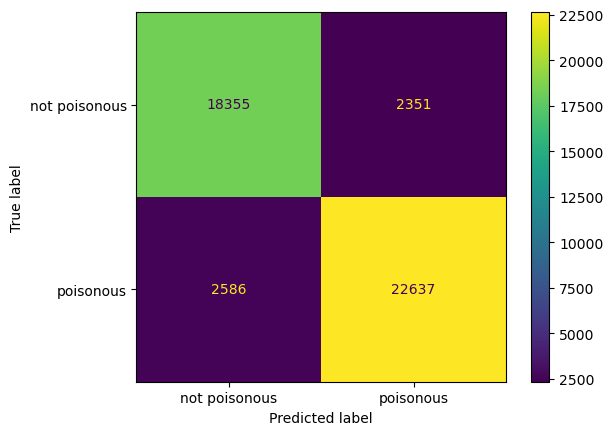

In [ ]:
# Define a pipeline
pipe_naive_decision_tree = Pipeline([("transformer", ct),
                  ("Tree", DecisionTreeClassifier(random_state = 42))])

# Perform cross-validation
cv_results = cross_validate(pipe_naive_decision_tree, X_train, y_train, cv=5, return_train_score=True)

# Print the training and the validation scores
print("Cross-Validation and Training Scores:")
print(f"Training Accuracy: {cv_results['train_score'].mean()}")
print(f"Std Dev Training Accuracy: {cv_results['train_score'].std()}")
print()
print(f"Validation Accuracy: {cv_results['test_score'].mean()}")
print(f"Std Dev Validation Accuracy: {cv_results['test_score'].std()}")
print()

# Plot the confusion matrix
pred_naive_decision_tree = cross_val_predict(pipe_naive_decision_tree, X_train, y_train, cv=5)
cm_naive_decision_tree = confusion_matrix(y_train, pred_naive_decision_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_naive_decision_tree, display_labels=["not poisonous", "poisonous"])

disp.plot()
plt.show()

In [ ]:
# Cross-validation metrics
naive_decision_tree_recall= recall_score(y_train, pred_naive_decision_tree)
naive_decision_tree_specificity = recall_score(y_train, pred_naive_decision_tree, pos_label=0)
naive_decision_tree_precision = precision_score(y_train, pred_naive_decision_tree)
naive_decision_tree_f1 = f1_score(y_train, pred_naive_decision_tree)

print(f"{naive_decision_tree_recall=}")
print(f"{naive_decision_tree_specificity=}")
print(f"{naive_decision_tree_precision=}")
print(f"{naive_decision_tree_f1=}")


naive_decision_tree_recall=0.8974745272172224
naive_decision_tree_specificity=0.8864580314884575
naive_decision_tree_precision=0.9059148391227789
naive_decision_tree_f1=0.9016749317878553


In [ ]:
# Fit the training set
pipe_naive_decision_tree.fit(X_train, y_train)

# Predict on the training set
y_train_pred = pipe_naive_decision_tree.predict(X_train)

# Calculate training metrics
train_precision = precision_score(y_train, y_train_pred)
train_specificity = recall_score(y_train, y_train_pred, pos_label=0)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print(f"Training Recall: {train_recall:.2f}")
print(f"Training Specificity: {train_specificity:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training F1 Score: {train_f1:.2f}")

Training Recall: 0.90
Training Specificity: 0.89
Training Precision: 0.91
Training F1 Score: 0.90


For tree-based models it's best to use Ordinal Encoding instead of One-Hot encoding. We already have our categorical values encoded ordinally, so we don't need to create a column transformer in order to do that. So let's train a simple Decision Tree model to compare its performance to the one with One-Hot encoding:

Cross-Validation and Training Scores:
Training Accuracy: 1.0
Std Dev Training Accuracy: 0.0

Validation Accuracy: 0.9763548350125945
Std Dev Validation Accuracy: 0.0015196181299480173



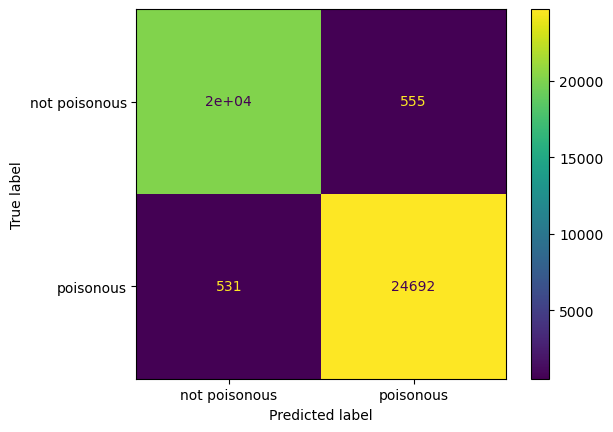

In [ ]:
# Define a pipeline
simple_decision_tree = DecisionTreeClassifier(random_state = 42)

# Perform cross-validation
cv_results = cross_validate(simple_decision_tree, X_train, y_train, cv=5, return_train_score=True)

# Print the training and the validation scores
print("Cross-Validation and Training Scores:")
print(f"Training Accuracy: {cv_results['train_score'].mean()}")
print(f"Std Dev Training Accuracy: {cv_results['train_score'].std()}")
print()
print(f"Validation Accuracy: {cv_results['test_score'].mean()}")
print(f"Std Dev Validation Accuracy: {cv_results['test_score'].std()}")
print()

# Plot the confusion matrix
pred_simple_decision_tree = cross_val_predict(simple_decision_tree, X_train, y_train, cv=5)
cm_simple_decision_tree = confusion_matrix(y_train, pred_simple_decision_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_simple_decision_tree, display_labels=["not poisonous", "poisonous"])

disp.plot()
plt.show()

In [ ]:
# Cross-validation metrics
simple_decision_tree_recall= recall_score(y_train, pred_simple_decision_tree)
simple_decision_tree_specificity = recall_score(y_train, pred_simple_decision_tree, pos_label=0)
simple_decision_tree_precision = precision_score(y_train, pred_simple_decision_tree)
simple_decision_tree_f1 = f1_score(y_train, pred_simple_decision_tree)

print(f"{simple_decision_tree_recall=}")
print(f"{simple_decision_tree_specificity=}")
print(f"{simple_decision_tree_precision=}")
print(f"{simple_decision_tree_f1=}")

simple_decision_tree_recall=0.9789477857511002
simple_decision_tree_specificity=0.9731961750217328
simple_decision_tree_precision=0.9780171901612073
simple_decision_tree_f1=0.9784822666930849


In [ ]:
# Fit the training set
simple_decision_tree.fit(X_train, y_train)

# Predict on the training set
y_train_pred = simple_decision_tree.predict(X_train)

# Calculate training metrics
train_precision = precision_score(y_train, y_train_pred)
train_specificity = recall_score(y_train, y_train_pred, pos_label=0)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print(f"Training Recall: {train_recall:.2f}")
print(f"Training Specificity: {train_specificity:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training F1 Score: {train_f1:.2f}")

Training Recall: 1.00
Training Specificity: 1.00
Training Precision: 1.00
Training F1 Score: 1.00


The scores are already quite good! They are actually really similar to the scores of the kNN model. Later we will try to look for the best hyperparameters for this Decision tree as well.

## **3.4 Random Forest Model**

**Naive Random Forest**

Same as for the Decision Tree we first train a Random Forest using One-Hot Encoding.

Cross-Validation and Training Scores:
Training Accuracy: 0.8950554141195008
Std Dev Training Accuracy: 0.0008668584906352667

Validation Accuracy: 0.8927910605959862
Std Dev Validation Accuracy: 0.0034567786661515547



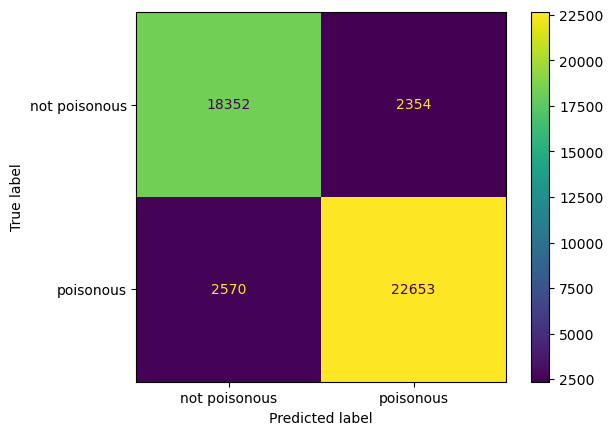

In [ ]:
pipe_naive_forest = Pipeline([("transformer", ct),
                  ("Forest", RandomForestClassifier(random_state=42))])

# Perform cross-validation
cv_results = cross_validate(pipe_naive_forest, X_train, y_train, cv=5, return_train_score=True)

# Print the training and the validation scores
print("Cross-Validation and Training Scores:")
print(f"Training Accuracy: {cv_results['train_score'].mean()}")
print(f"Std Dev Training Accuracy: {cv_results['train_score'].std()}")
print()
print(f"Validation Accuracy: {cv_results['test_score'].mean()}")
print(f"Std Dev Validation Accuracy: {cv_results['test_score'].std()}")
print()

# Plot the confusion matrix
pred_naive_forest = cross_val_predict(pipe_naive_forest, X_train, y_train, cv=5)
cm_naive_forest = confusion_matrix(y_train, pred_naive_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_naive_forest, display_labels=["not poisonous", "poisonous"])

disp.plot()
plt.show()

In [ ]:
# metrics
naive_forest_recall= recall_score(y_train, pred_naive_forest)
naive_forest_specificity = recall_score(y_train, pred_naive_forest, pos_label=0)
naive_forest_precision = precision_score(y_train, pred_naive_forest)
naive_forest_f1 = f1_score(y_train, pred_naive_forest)

print(f"{naive_forest_recall=}")
print(f"{naive_forest_specificity=}")
print(f"{naive_forest_precision=}")
print(f"{naive_forest_f1=}")

naive_forest_recall=0.8981088688895056
naive_forest_specificity=0.8863131459480343
naive_forest_precision=0.9058663574199224
naive_forest_f1=0.9019709337049572


Also same as before, because this is a tree-based model,  there is actually no need to use One-Hot encoding, it's preferred to use Ordinal encoding. We will try to see the performance of a Random Forest Classifier as a simple model:

Cross-Validation and Training Scores:
Training Accuracy: 1.0
Std Dev Training Accuracy: 0.0

Validation Accuracy: 0.9900280645288605
Std Dev Validation Accuracy: 0.0007990847705152096



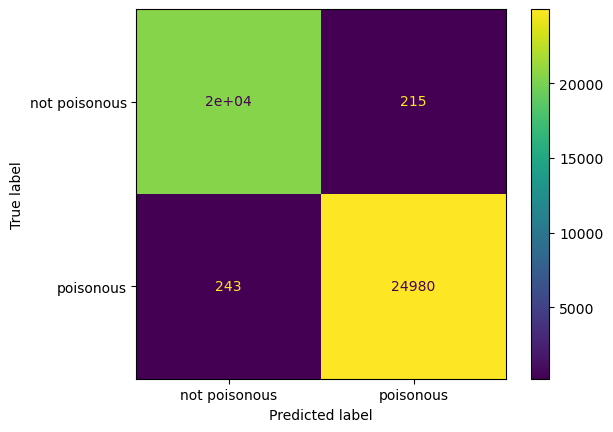

In [ ]:
simple_forest = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_results = cross_validate(simple_forest, X_train, y_train, cv=5, return_train_score=True)

# Print the training and the validation scores
print("Cross-Validation and Training Scores:")
print(f"Training Accuracy: {cv_results['train_score'].mean()}")
print(f"Std Dev Training Accuracy: {cv_results['train_score'].std()}")
print()
print(f"Validation Accuracy: {cv_results['test_score'].mean()}")
print(f"Std Dev Validation Accuracy: {cv_results['test_score'].std()}")
print()

# Plot the confusion matrix
pred_simple_forest = cross_val_predict(simple_forest, X_train, y_train, cv=5)
cm_simple_forest = confusion_matrix(y_train, pred_simple_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_simple_forest, display_labels=["not poisonous", "poisonous"])

disp.plot()
plt.show()

In [ ]:
# Cross-validation metrics
simple_forest_recall= recall_score(y_train, pred_simple_forest)
simple_forest_specificity = recall_score(y_train, pred_simple_forest, pos_label=0)
simple_forest_precision = precision_score(y_train, pred_simple_forest)
simple_forest_f1 = f1_score(y_train, pred_simple_forest)

print(f"{simple_forest_recall=}")
print(f"{simple_forest_specificity=}")
print(f"{simple_forest_precision=}")
print(f"{simple_forest_f1=}")

simple_forest_recall=0.9903659358521983
simple_forest_specificity=0.9896165362696803
simple_forest_precision=0.9914665608255606
simple_forest_f1=0.9909159427188702


The results are also really good! Actually, most scores are even better than for our standard scaled simple kNN model - which was our best until now - except for the recall which is slightly worse. Since the recall is the most important metric for our application, our goal is obviously to improve this in the hyperparameter search.

In [ ]:
# Fit the training set
simple_forest.fit(X_train, y_train)

# Predict on the training set
y_train_pred = simple_forest.predict(X_train)

# Calculate training metrics
train_precision = precision_score(y_train, y_train_pred)
train_specificity = recall_score(y_train, y_train_pred, pos_label=0)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print(f"Training Recall: {train_recall:.2f}")
print(f"Training Specificity: {train_specificity:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training F1 Score: {train_f1:.2f}")

Training Recall: 1.00
Training Specificity: 1.00
Training Precision: 1.00
Training F1 Score: 1.00


It makes sense that it fits the training set perfectly but we obviously expect the result to be worse on the test set. Our simple model worked way better than the one with One-Hot encoding, so we will use the simple one for hyperparamter search.

Now, we need to choose the best algorithms that we will further explore. kNN and Random Forest worked incredebly well, so we will look for hyperparameters for them to make them even better. Decision tree also turned out to have great metric scores, so we will try to improve it aswell. Logistic Regression was the worst one of these but maybe we will try to tweak it and find the right regularization technique or see why it doesn't work as well.

# **4. Hyperparameter search**

## **4.1 kNN Hyperparameters**

The model with the StandardScaler is really good but we need to find the best k for kNN

In [ ]:
# pipe_scaler_kNN is the pipeline we will be using

ks = list(range(1,11)) # Possible values of k

param_grid_kNN = {"kNN__n_neighbors" : ks}

grid_kNN = GridSearchCV(pipe_scaler_kNN, param_grid=param_grid_kNN, cv=5, verbose=3)

grid_kNN.fit(X_train, y_train)

print("Best CV score:", grid_kNN.best_score_)
print("Best parameter:", grid_kNN.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ................kNN__n_neighbors=1;, score=0.990 total time=   3.6s
[CV 2/5] END ................kNN__n_neighbors=1;, score=0.988 total time=   3.5s
[CV 3/5] END ................kNN__n_neighbors=1;, score=0.989 total time=   3.4s
[CV 4/5] END ................kNN__n_neighbors=1;, score=0.987 total time=   3.5s
[CV 5/5] END ................kNN__n_neighbors=1;, score=0.988 total time=   3.4s
[CV 1/5] END ................kNN__n_neighbors=2;, score=0.989 total time=   3.4s
[CV 2/5] END ................kNN__n_neighbors=2;, score=0.987 total time=   3.5s
[CV 3/5] END ................kNN__n_neighbors=2;, score=0.988 total time=   3.4s
[CV 4/5] END ................kNN__n_neighbors=2;, score=0.987 total time=   3.4s
[CV 5/5] END ................kNN__n_neighbors=2;, score=0.986 total time=   3.8s
[CV 1/5] END ................kNN__n_neighbors=3;, score=0.991 total time=   3.8s
[CV 2/5] END ................kNN__n_neighbors=3;

Grid Search took a very long time when we tried to choose a list of ks from 1 to 31 but even then the result came out to be k=3, so we reduced our range to 10 to make the running time faster.

We tried another GridSearch with recall as the score it should consider, because this is the most important metric for our Problem, but it turns out that this doens't change the best number of neighbors.

In [ ]:
# pipe_scaler_kNN is the pipeline we will be using

ks = list(range(1,11)) # Possible values of k

param_grid_kNN = {"kNN__n_neighbors" : ks}

grid_kNN = GridSearchCV(pipe_scaler_kNN, param_grid=param_grid_kNN, cv=5, scoring='recall', verbose=3)

grid_kNN.fit(X_train, y_train)

print("Best CV score:", grid_kNN.best_score_)
print("Best parameter:", grid_kNN.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ................kNN__n_neighbors=1;, score=0.991 total time=   3.9s
[CV 2/5] END ................kNN__n_neighbors=1;, score=0.991 total time=   3.9s
[CV 3/5] END ................kNN__n_neighbors=1;, score=0.990 total time=   4.0s
[CV 4/5] END ................kNN__n_neighbors=1;, score=0.992 total time=   3.9s
[CV 5/5] END ................kNN__n_neighbors=1;, score=0.989 total time=   3.9s
[CV 1/5] END ................kNN__n_neighbors=2;, score=0.984 total time=   3.9s
[CV 2/5] END ................kNN__n_neighbors=2;, score=0.983 total time=   3.9s
[CV 3/5] END ................kNN__n_neighbors=2;, score=0.985 total time=   3.9s
[CV 4/5] END ................kNN__n_neighbors=2;, score=0.985 total time=   3.9s
[CV 5/5] END ................kNN__n_neighbors=2;, score=0.981 total time=   3.9s
[CV 1/5] END ................kNN__n_neighbors=3;, score=0.992 total time=   4.0s
[CV 2/5] END ................kNN__n_neighbors=3;

Let's now train a final kNN model with the best number k of neighbors and measure its performance.

Cross-Validation and Training Scores:
Training Accuracy: 0.9936859068034002
Std Dev Training Accuracy: 0.00018933253007740703

Validation Accuracy: 0.9887434963218864
Std Dev Validation Accuracy: 0.0011135731292414056



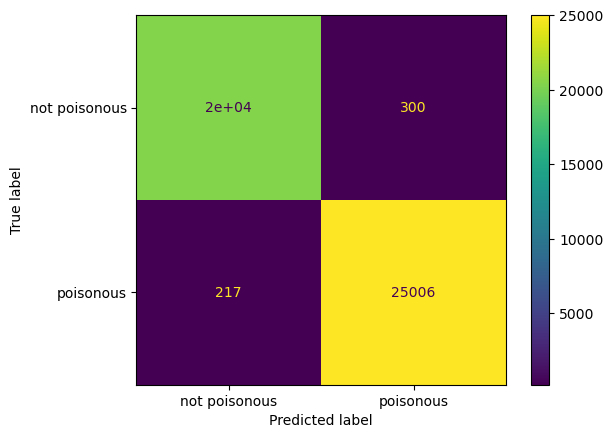

In [ ]:
# Define a pipeline
pipe_best_kNN = Pipeline([("transformer", ct_with_scaler),
                          ("kNN", KNeighborsClassifier(n_neighbors=3))])

# Perform cross-validation
cv_results = cross_validate(pipe_best_kNN, X_train, y_train, cv=5, return_train_score=True)
kNN_score = cv_results['train_score'].mean()

# Print the training and the validation scores
print("Cross-Validation and Training Scores:")
print(f"Training Accuracy: {cv_results['train_score'].mean()}")
print(f"Std Dev Training Accuracy: {cv_results['train_score'].std()}")
print()
print(f"Validation Accuracy: {cv_results['test_score'].mean()}")
print(f"Std Dev Validation Accuracy: {cv_results['test_score'].std()}")
print()

# Plot the confusion matrix
best_pred_kNN = cross_val_predict(pipe_best_kNN, X_train, y_train, cv=5)
cm_best_kNN = confusion_matrix(y_train, best_pred_kNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_kNN, display_labels=["not poisonous", "poisonous"])

disp.plot()
plt.show()

In [ ]:
# metrics
best_kNN_recall = recall_score(y_train, best_pred_kNN)
best_kNN_specificity = recall_score(y_train, best_pred_kNN, pos_label=0)
best_kNN_precision = precision_score(y_train, best_pred_kNN)
best_kNN_f1 = f1_score(y_train, best_pred_kNN)

print(f"{best_kNN_recall=}")
print(f"{best_kNN_specificity=}")
print(f"{best_kNN_precision=}")
print(f"{best_kNN_f1=}")

best_kNN_recall=0.9913967410696587
best_kNN_specificity=0.9855114459576935
best_kNN_precision=0.9881451039279222
best_kNN_f1=0.9897682518949513


In [ ]:
# Fit the model on the training set
pipe_best_kNN.fit(X_train, y_train)

# Predict on the training set
y_train_pred = pipe_best_kNN.predict(X_train)

# Calculate training metrics
train_precision = precision_score(y_train, y_train_pred)
train_specificity = recall_score(y_train, y_train_pred, pos_label=0)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print(f"Training Recall: {train_recall:.2f}")
print(f"Training Specificity: {train_specificity:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training F1 Score: {train_f1:.2f}")

Training Recall: 1.00
Training Specificity: 0.99
Training Precision: 0.99
Training F1 Score: 0.99


Great result! 🥳   

The last thing we will try to do is looking for the best threshold to improve the recall, arguably the most important metric for us:

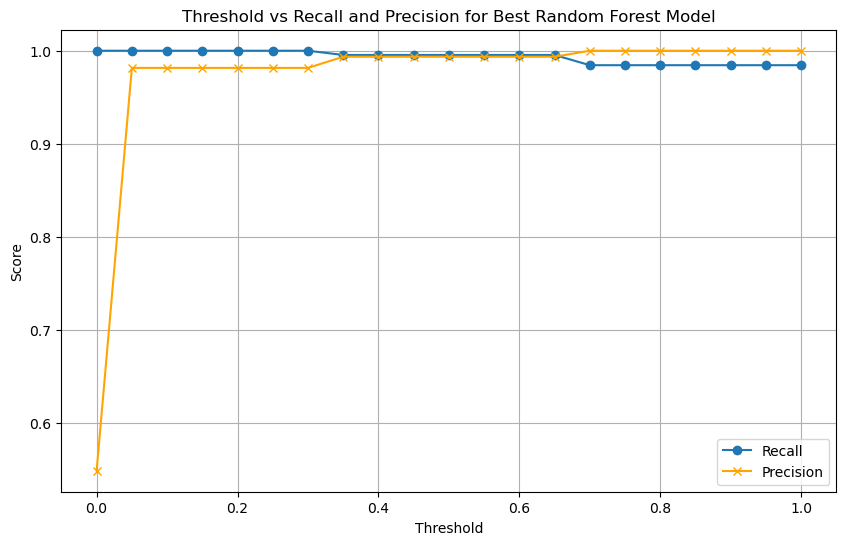

In [ ]:
best_kNN = grid_kNN.best_estimator_

# Predict probabilities
y_proba = best_kNN.predict_proba(X_train)[:, 1]  # Probability for the positive class

# Define thresholds
thresholds = np.arange(0.0, 1.05, 0.05)

# Compute recall and precision for each threshold
recalls = []
precisions = []

for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    recall = recall_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recalls.append(recall)
    precisions.append(precision)

# Plot threshold vs recall and precision
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, marker='o', label='Recall')
plt.plot(thresholds, precisions, marker='x', label='Precision', color='orange')
plt.title('Threshold vs Recall and Precision for Best Random Forest Model')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Since Precision is pretty much the same for different values of recall from circa 0.1 to 0.3, we choose our threshold visually and compute the recall for it:

In [ ]:
y_pred = (y_proba >= 0.3).astype(int)
recall = recall_score(y_train, y_pred)
print(recall)

1.0


This is a great value for recall, so we will consider including this value of threshold to our kNN model

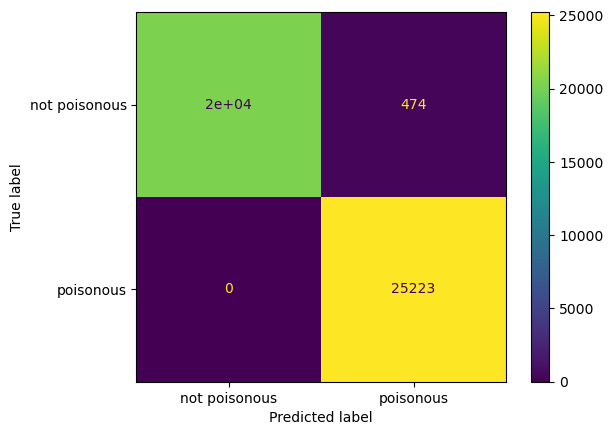

In [ ]:
# Final predictions using the optimal threshold
y_pred_optimal = (y_proba >= 0.3).astype(int)

# Plot the confusion matrix
cm_best_kNN = confusion_matrix(y_train, y_pred_optimal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_kNN, display_labels=["not poisonous", "poisonous"])

disp.plot()
plt.show()

0 False Positives is all we could wish for for our model for training (unless it's the case of overfitting but let's hope not).

Let's look at some more interesting visualizations for this model.  
**Warning:** we will plot error rates on test data, which could be seen as test data leakage into our training process, however from now on, we won't tweak this model anymore and will only use these for visualization purposes.

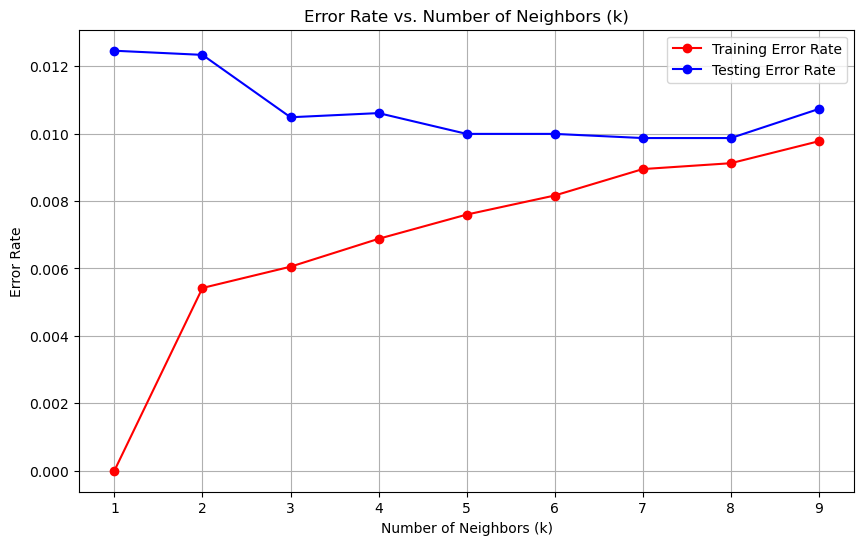

In [ ]:
# Lists to store the accuracy scores for training and testing sets
train_accuracy_scores = []
test_accuracy_scores = []

# Define the range of k values to test
k_values = range(1, 10)

# Loop over the range of k values
for k in k_values:
    # Set the number of neighbors for the kNN classifier
    pipe_best_kNN.set_params(kNN__n_neighbors=k)

    # Train the model
    pipe_best_kNN.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = pipe_best_kNN.predict(X_train)
    # Predict on the testing set
    y_test_pred = pipe_best_kNN.predict(X_test)

    # Calculate the accuracy on the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    # Calculate the accuracy on the testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store the accuracy in the lists
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# Calculate the error rates
train_error_rates = [1 - acc for acc in train_accuracy_scores]
test_error_rates = [1 - acc for acc in test_accuracy_scores]

# Plotting the Error Rate vs. k for both training and testing sets
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_error_rates, marker='o', color='red', label='Training Error Rate')
plt.plot(k_values, test_error_rates, marker='o', color='blue', label='Testing Error Rate')
plt.title('Error Rate vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

The training error graph shows that k = 1 has the lowest error rate, however this is clearly the case of overfitting on the training data because the error on the testing data is the highest here. That highlights the importance of using cross-validation. Cross-validation used in GridSearch provides a more realistic performance estimate by evaluating the model on different data subsets. The k number of neighbors we got with GridSearch is more optimal (k=3) but it doesn't have the best error rate.  
In hindsight, the best number of neighbors for the test data would have been 5 or 6 but we will obviously stick to our final model to avoid test data leakage affecting our decisions.

## **4.2 Logistic Regression hyperparameter**s

We will be improving our Logistic Regression model with scaling because the one with Polynomial Features works significantly worse. And we will try to implement both l1 and l2 regularization even if we do think that all features are important in our dataset for the target predictions (which is the opposite of when one would want to use l1 regularization). However, since Logistic Regression so far is the worst model we have, maybe it's worth trying to improve it in any way possible.

**Naive L1-Regularization**

Cross-validation accuracy scores:  [0.74896582 0.74297845 0.74243414 0.75647725 0.75002722]
Mean cross-validation accuracy: 0.7482
Standard deviation of cross-validation accuracy: 0.0052

Cross-validation log loss scores:  [0.52358504 0.52796153 0.5270557  0.51452542 0.51817316]
Mean cross-validation log loss: 0.5223
Standard deviation of cross-validation log loss: 0.0052

Training accuracy scores:  [0.74936723 0.74980268 0.7499932  0.74697221 0.74953734]
Mean training accuracy: 0.7491
Standard deviation of training accuracy: 0.0011



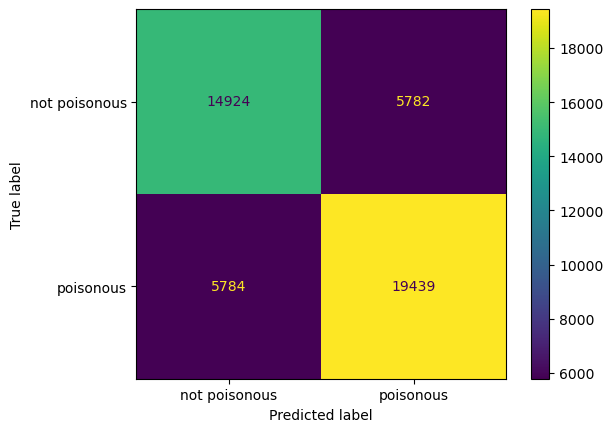

In [ ]:
# ct_with_scaler is the transformer we will use
pipe_l1_log_reg = Pipeline([("transformer", ct_with_scaler),
                  ("log_reg", LogisticRegression(max_iter=5_000, penalty='l1', solver='saga'))])

cv_results_l1_log_reg = cross_validate(pipe_l1_log_reg, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Extract validation scores
accuracy_scores_l1_log_reg = cv_results_l1_log_reg['test_accuracy']
log_loss_scores_l1_log_reg = -cv_results_l1_log_reg['test_neg_log_loss']

# Extract training scores
train_accuracy_scores_l1_log_reg = cv_results_l1_log_reg['train_accuracy']
train_log_loss_scores_l1_log_reg = -cv_results_l1_log_reg['train_neg_log_loss']


# Print cross-validation accuracy scores
print("Cross-validation accuracy scores: ", accuracy_scores_l1_log_reg)
print(f"Mean cross-validation accuracy: {np.mean(accuracy_scores_l1_log_reg):.4f}")
print(f"Standard deviation of cross-validation accuracy: {np.std(accuracy_scores_l1_log_reg):.4f}")
print()
# Print cross-validation log loss scores
print("Cross-validation log loss scores: ", log_loss_scores_l1_log_reg)
print(f"Mean cross-validation log loss: {np.mean(log_loss_scores_l1_log_reg):.4f}")
print(f"Standard deviation of cross-validation log loss: {np.std(log_loss_scores_l1_log_reg):.4f}")
print()
# Print training accuracy scores
print("Training accuracy scores: ", train_accuracy_scores_l1_log_reg)
print(f"Mean training accuracy: {np.mean(train_accuracy_scores_l1_log_reg):.4f}")
print(f"Standard deviation of training accuracy: {np.std(train_accuracy_scores_l1_log_reg):.4f}")
print()

# Plot the confusion matrix
l1_pred_log_reg = cross_val_predict(pipe_l1_log_reg, X_train, y_train, cv=5)
cm_l1_log_reg = confusion_matrix(y_train, l1_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_l1_log_reg, display_labels=["not poisonous", "poisonous"])

disp.plot()
plt.show()

**Naive L2-Regularization**

Cross-validation accuracy scores:  [0.74918354 0.74319617 0.74297845 0.75625953 0.74991835]
Mean cross-validation accuracy: 0.7483
Standard deviation of cross-validation accuracy: 0.0049

Cross-validation log loss scores:  [0.52373103 0.52819419 0.52726348 0.51467239 0.51848435]
Mean cross-validation log loss: 0.5225
Standard deviation of cross-validation log loss: 0.0052

Training accuracy scores:  [0.74947609 0.74972104 0.74969382 0.74672727 0.74934683]
Mean training accuracy: 0.7490
Standard deviation of training accuracy: 0.0011



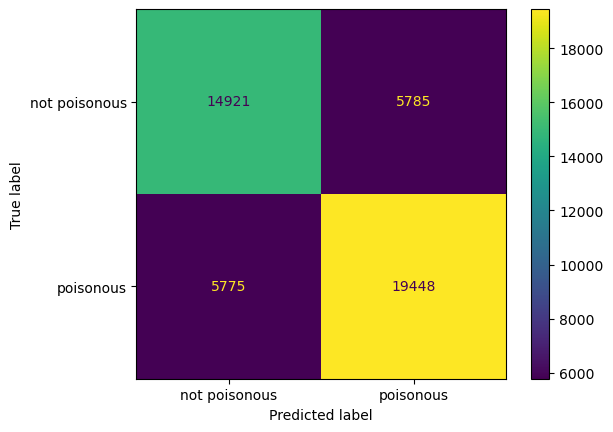

In [ ]:
pipe_l2_log_reg = Pipeline([("transformer", ct_with_scaler),
                  ("log_reg", LogisticRegression(max_iter=5_000, penalty='l2'))])

cv_results_l2_log_reg = cross_validate(pipe_l2_log_reg, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Extract validation scores
accuracy_scores_l2 = cv_results_l2_log_reg['test_accuracy']
log_loss_scores_l2 = -cv_results_l2_log_reg['test_neg_log_loss']

# Extract training scores
train_accuracy_scores_l2 = cv_results_l2_log_reg['train_accuracy']
train_log_loss_scores_l2 = -cv_results_l2_log_reg['train_neg_log_loss']

# Print cross-validation accuracy scores
print("Cross-validation accuracy scores: ", accuracy_scores_l2)
print(f"Mean cross-validation accuracy: {np.mean(accuracy_scores_l2):.4f}")
print(f"Standard deviation of cross-validation accuracy: {np.std(accuracy_scores_l2):.4f}")
print()
# Print cross-validation log loss scores
print("Cross-validation log loss scores: ", log_loss_scores_l2)
print(f"Mean cross-validation log loss: {np.mean(log_loss_scores_l2):.4f}")
print(f"Standard deviation of cross-validation log loss: {np.std(log_loss_scores_l2):.4f}")
print()
# Print training accuracy scores
print("Training accuracy scores: ", train_accuracy_scores_l2)
print(f"Mean training accuracy: {np.mean(train_accuracy_scores_l2):.4f}")
print(f"Standard deviation of training accuracy: {np.std(train_accuracy_scores_l2):.4f}")
print()
# Plot the confusion matrix
l2_pred_log_reg = cross_val_predict(pipe_l2_log_reg, X_train, y_train, cv=5)
cm_l2_log_reg = confusion_matrix(y_train, l2_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_l2_log_reg, display_labels=["not poisonous", "poisonous"])

disp.plot()
plt.show()

In [ ]:
param_grid = {
    'log_reg__C': np.logspace(-4, 4, 10)  # 10 values from 1e-4 to 1e4 on a log scale
}

grid_search_l1 = GridSearchCV(pipe_l1_log_reg,
                             param_grid,
                             cv=5, verbose=3)
grid_search_l1.fit(X_train, y_train)
grid_search_l2 = GridSearchCV(pipe_l2_log_reg,
                             param_grid,
                             cv=5, verbose=3)
grid_search_l2.fit(X_train, y_train)

best_parameter_l1 = grid_search_l1.best_params_
best_parameter_l2 = grid_search_l2.best_params_

print("Best parameters for l1 found: ", grid_search_l1.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search_l1.best_score_))

print("Best parameters for l2 found: ", grid_search_l2.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search_l2.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .................log_reg__C=0.0001;, score=0.549 total time=   0.1s
[CV 2/5] END .................log_reg__C=0.0001;, score=0.549 total time=   0.0s
[CV 3/5] END .................log_reg__C=0.0001;, score=0.549 total time=   0.0s
[CV 4/5] END .................log_reg__C=0.0001;, score=0.549 total time=   0.0s
[CV 5/5] END .................log_reg__C=0.0001;, score=0.549 total time=   0.0s
[CV 1/5] END ...log_reg__C=0.000774263682681127;, score=0.617 total time=   0.1s
[CV 2/5] END ...log_reg__C=0.000774263682681127;, score=0.620 total time=   0.1s
[CV 3/5] END ...log_reg__C=0.000774263682681127;, score=0.609 total time=   0.1s
[CV 4/5] END ...log_reg__C=0.000774263682681127;, score=0.611 total time=   0.1s
[CV 5/5] END ...log_reg__C=0.000774263682681127;, score=0.605 total time=   0.1s
[CV 1/5] END ...log_reg__C=0.005994842503189409;, score=0.721 total time=   0.4s
[CV 2/5] END ...log_reg__C=0.005994842503189409;

Now, what's left to do is to train two regularized Logistic Regression models and choosing one of them as our best one or deciding not to use it among our best models at all:

Cross-validation accuracy scores:  [0.74951012 0.74286958 0.74319617 0.7560418  0.75024496]
Mean cross-validation accuracy: 0.7484
Standard deviation of cross-validation accuracy: 0.0049

Cross-validation log loss scores:  [0.52371036 0.5280803  0.5272507  0.51469102 0.5183675 ]
Mean cross-validation log loss: 0.5224
Standard deviation of cross-validation log loss: 0.0052

Training accuracy scores:  [0.74961217 0.74974825 0.75023814 0.74697221 0.7492924 ]
Mean training accuracy: 0.7492
Standard deviation of training accuracy: 0.0011

Training log loss scores:  [0.52103981 0.52000396 0.52012542 0.5233199  0.5223765 ]
Mean training log loss: 0.5214
Standard deviation of training log loss: 0.0013



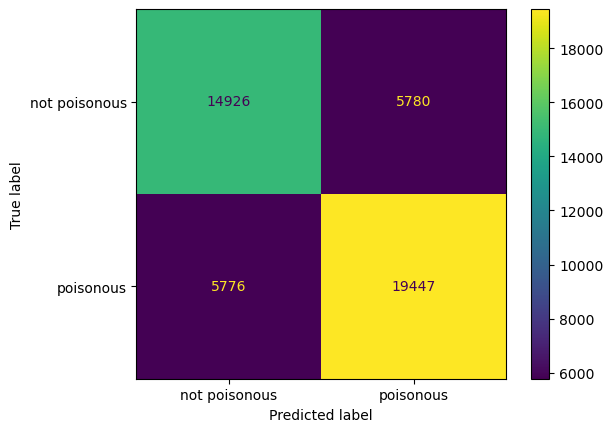

In [ ]:
pipe_l1_best_log_reg = Pipeline([("transformer", ct_with_scaler),
                  ("log_reg", LogisticRegression(max_iter=5_000, penalty='l1', solver='saga', C=best_parameter_l1['log_reg__C']))])

cv_results_l1_best_log_reg = cross_validate(pipe_l1_best_log_reg, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Extract validation scores
accuracy_scores_l1 = cv_results_l1_best_log_reg['test_accuracy']
log_loss_scores_l1 = -cv_results_l1_best_log_reg['test_neg_log_loss']

# Extract training scores
train_accuracy_scores_l1 = cv_results_l1_best_log_reg['train_accuracy']
train_log_loss_scores_l1 = -cv_results_l1_best_log_reg['train_neg_log_loss']


# Print cross-validation accuracy scores
print("Cross-validation accuracy scores: ", accuracy_scores_l1)
print(f"Mean cross-validation accuracy: {np.mean(accuracy_scores_l1):.4f}")
print(f"Standard deviation of cross-validation accuracy: {np.std(accuracy_scores_l1):.4f}")
print()
# Print cross-validation log loss scores
print("Cross-validation log loss scores: ", log_loss_scores_l1)
print(f"Mean cross-validation log loss: {np.mean(log_loss_scores_l1):.4f}")
print(f"Standard deviation of cross-validation log loss: {np.std(log_loss_scores_l1):.4f}")
print()
# Print training accuracy scores
print("Training accuracy scores: ", train_accuracy_scores_l1)
print(f"Mean training accuracy: {np.mean(train_accuracy_scores_l1):.4f}")
print(f"Standard deviation of training accuracy: {np.std(train_accuracy_scores_l1):.4f}")
print()
# Print training log loss scores
print("Training log loss scores: ", train_log_loss_scores_l1)
print(f"Mean training log loss: {np.mean(train_log_loss_scores_l1):.4f}")
print(f"Standard deviation of training log loss: {np.std(train_log_loss_scores_l1):.4f}")
print()

# Plot the confusion matrix
l1_best_pred_log_reg = cross_val_predict(pipe_l1_best_log_reg, X_train, y_train, cv=5)
cm_l1_best_log_reg = confusion_matrix(y_train, l1_best_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_l1_best_log_reg, display_labels=["not poisonous", "poisonous"])

disp.plot()
plt.show()

In [ ]:
# metrics
l1_best_log_reg_recall = recall_score(y_train, l1_best_pred_log_reg)
l1_best_log_reg_specificity = recall_score(y_train, l1_best_pred_log_reg, pos_label=0)
l1_best_log_reg_precision = precision_score(y_train, l1_best_pred_log_reg)
l1_best_log_reg_f1 = f1_score(y_train, l1_best_pred_log_reg)

print(f"{l1_best_log_reg_recall=}")
print(f"{l1_best_log_reg_specificity=}")
print(f"{l1_best_log_reg_precision=}")
print(f"{l1_best_log_reg_f1=}")

l1_best_log_reg_recall=0.7710026563057527
l1_best_log_reg_specificity=0.7208538587848933
l1_best_log_reg_precision=0.7708804059142982
l1_best_log_reg_f1=0.7709415262636274


Cross-validation accuracy scores:  [0.74896582 0.74297845 0.74276072 0.75691269 0.75035384]
Mean cross-validation accuracy: 0.7484
Standard deviation of cross-validation accuracy: 0.0052

Cross-validation log loss scores:  [0.52354189 0.52793249 0.52697946 0.51445819 0.51810404]
Mean cross-validation log loss: 0.5222
Standard deviation of cross-validation log loss: 0.0052

Training accuracy scores:  [0.74917671 0.74974825 0.74980268 0.74697221 0.74978228]
Mean training accuracy: 0.7491
Standard deviation of training accuracy: 0.0011

Training log loss scores:  [0.52080812 0.51977107 0.51989184 0.52308587 0.52214206]
Mean training log loss: 0.5211
Standard deviation of training log loss: 0.0013


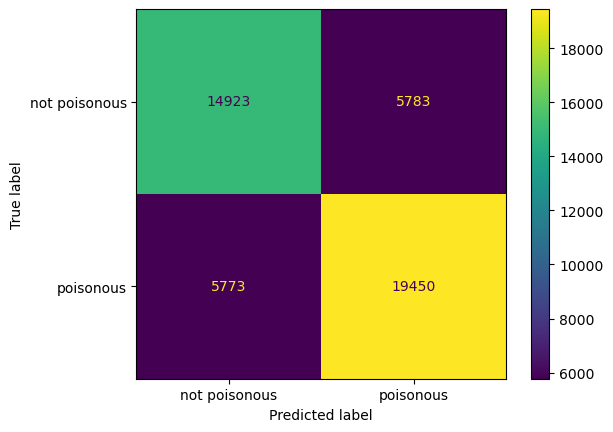

In [ ]:
pipe_l2_best_log_reg = Pipeline([("transformer", ct_with_scaler),
                  ("log_reg", LogisticRegression(max_iter=5_000, penalty='l2', C=best_parameter_l2['log_reg__C']))])

cv_results_l2_best_log_reg = cross_validate(pipe_l2_best_log_reg, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Extract validation scores
accuracy_scores_l2 = cv_results_l2_best_log_reg['test_accuracy']
log_loss_scores_l2 = -cv_results_l2_best_log_reg['test_neg_log_loss']

# Extract training scores
train_accuracy_scores_l2 = cv_results_l2_best_log_reg['train_accuracy']
train_log_loss_scores_l2 = -cv_results_l2_best_log_reg['train_neg_log_loss']

LogReg_score = np.mean(accuracy_scores_l2)

# Print cross-validation accuracy scores
print("Cross-validation accuracy scores: ", accuracy_scores_l2)
print(f"Mean cross-validation accuracy: {np.mean(accuracy_scores_l2):.4f}")
print(f"Standard deviation of cross-validation accuracy: {np.std(accuracy_scores_l2):.4f}")
print()
# Print cross-validation log loss scores
print("Cross-validation log loss scores: ", log_loss_scores_l2)
print(f"Mean cross-validation log loss: {np.mean(log_loss_scores_l2):.4f}")
print(f"Standard deviation of cross-validation log loss: {np.std(log_loss_scores_l2):.4f}")
print()
# Print training accuracy scores
print("Training accuracy scores: ", train_accuracy_scores_l2)
print(f"Mean training accuracy: {np.mean(train_accuracy_scores_l2):.4f}")
print(f"Standard deviation of training accuracy: {np.std(train_accuracy_scores_l2):.4f}")
print()
# Print training log loss scores
print("Training log loss scores: ", train_log_loss_scores_l2)
print(f"Mean training log loss: {np.mean(train_log_loss_scores_l2):.4f}")
print(f"Standard deviation of training log loss: {np.std(train_log_loss_scores_l2):.4f}")

# Plot the confusion matrix
l2_best_pred_log_reg = cross_val_predict(pipe_l2_best_log_reg, X_train, y_train, cv=5)
cm_l2_best_log_reg = confusion_matrix(y_train, l2_best_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_l2_best_log_reg, display_labels=["not poisonous", "poisonous"])

disp.plot()
plt.show()

In [ ]:
l2_best_log_reg_recall = recall_score(y_train, l2_best_pred_log_reg)
l2_best_log_reg_specificity = recall_score(y_train, l2_best_pred_log_reg, pos_label=0)
l2_best_log_reg_precision = precision_score(y_train, l2_best_pred_log_reg)
l2_best_log_reg_f1 = f1_score(y_train, l2_best_pred_log_reg)

print(f"{l2_best_log_reg_recall=}")
print(f"{l2_best_log_reg_specificity=}")
print(f"{l2_best_log_reg_precision=}")
print(f"{l2_best_log_reg_f1=}")

l2_best_log_reg_recall=0.7711215953693058
l2_best_log_reg_specificity=0.7207089732444703
l2_best_log_reg_precision=0.7708159949272778
l2_best_log_reg_f1=0.7709687648644364


In [ ]:
# Fit the model on the training set
pipe_l2_best_log_reg.fit(X_train, y_train)

# Predict on the training set
y_train_pred = pipe_l2_best_log_reg.predict(X_train)

# Calculate training metrics
train_precision = precision_score(y_train, y_train_pred)
train_specificity = recall_score(y_train, y_train_pred, pos_label=0)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print(f"Training Recall: {train_recall:.2f}")
print(f"Training Specificity: {train_specificity:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training F1 Score: {train_f1:.2f}")

Training Recall: 0.77
Training Specificity: 0.72
Training Precision: 0.77
Training F1 Score: 0.77


Their results are not that different, so let's stick to L2 regularized Log Regression as our best model.

## **4.3 Decision Tree hyperparameters**

Now we want to train the hyperparameters of the decision tree. Possible options for regularization include: max_depth, max_features, max_leaf_nodes, min_samples_split, min_samples_leaf, min_impurity_decrease. Due to already really long runtimes we decided for now against optimizing max_leaf_nodes, as this would mean testing a lot of additional values in the GridSearch.

First, we tried looking for hyperparameters via GridSearch but due to extremely long runtimes, we now decided to use RandomSearch.

In [ ]:
depth = list(range(1,50))
features = list(range(1, 10)) # we have 11 features
features.append(None) # we also check the option of having max_features = None
samples_split = list(range(2,11))
samples_leaf = list(range(1,11))

param_distributions = {'max_depth': depth, 'max_features': features, 'min_samples_split': samples_split, 'min_samples_leaf': samples_leaf}

random_search = RandomizedSearchCV(simple_decision_tree, param_distributions=param_distributions, n_iter=100, cv=5, random_state=42, verbose=3)

random_search.fit(X_train, y_train)

print("Best CV score:", random_search.best_score_)
print("Best parameter:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END max_depth=18, max_features=6, min_samples_leaf=6, min_samples_split=2;, score=0.974 total time=   0.1s
[CV 2/5] END max_depth=18, max_features=6, min_samples_leaf=6, min_samples_split=2;, score=0.968 total time=   0.1s
[CV 3/5] END max_depth=18, max_features=6, min_samples_leaf=6, min_samples_split=2;, score=0.963 total time=   0.1s
[CV 4/5] END max_depth=18, max_features=6, min_samples_leaf=6, min_samples_split=2;, score=0.971 total time=   0.1s
[CV 5/5] END max_depth=18, max_features=6, min_samples_leaf=6, min_samples_split=2;, score=0.967 total time=   0.1s
[CV 1/5] END max_depth=1, max_features=None, min_samples_leaf=6, min_samples_split=7;, score=0.611 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, min_samples_leaf=6, min_samples_split=7;, score=0.615 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, min_samples_leaf=6, min_samples_split=7;, score=0.606 total time=   0.0s
[CV

Now we train a Decision Tree with the best parameters that the GridSearch/RandomSearch returned.

In [ ]:
# Define the best parameters
tree_depth = random_search.best_params_['max_depth']
tree_max_features = random_search.best_params_['max_features']
tree_min_samples_leaf = random_search.best_params_['min_samples_leaf']
tree_min_samples_split = random_search.best_params_['min_samples_split']

Cross-Validation and Training Scores:
Training Accuracy: 0.997011693914407
Std Dev Training Accuracy: 0.0005586540248175372

Validation Accuracy: 0.9764854543629327
Std Dev Validation Accuracy: 0.0019128736917377951



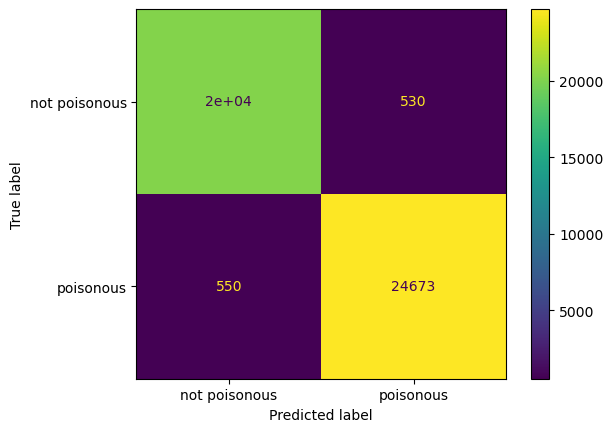

In [ ]:
# Define a pipeline
best_Tree = DecisionTreeClassifier(max_depth = tree_depth, max_features = tree_max_features, min_samples_split = tree_min_samples_split, min_samples_leaf = tree_min_samples_leaf, random_state = 42)

# Perform cross-validation
cv_results = cross_validate(best_Tree, X_train, y_train, cv=5, return_train_score=True)
Tree_score = cv_results['train_score'].mean()

# Print the training and the validation scores
print("Cross-Validation and Training Scores:")
print(f"Training Accuracy: {cv_results['train_score'].mean()}")
print(f"Std Dev Training Accuracy: {cv_results['train_score'].std()}")
print()
print(f"Validation Accuracy: {cv_results['test_score'].mean()}")
print(f"Std Dev Validation Accuracy: {cv_results['test_score'].std()}")
print()

# Plot the confusion matrix
best_pred_Tree = cross_val_predict(best_Tree, X_train, y_train, cv=5)
cm_best_Tree = confusion_matrix(y_train, best_pred_Tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_Tree, display_labels=["not poisonous", "poisonous"])

disp.plot()
plt.show()

In [ ]:
# Metrics
best_Tree_recall = recall_score(y_train, best_pred_Tree)
best_Tree_specificity = recall_score(y_train, best_pred_Tree, pos_label=0)
best_Tree_precision = precision_score(y_train, best_pred_Tree)
best_Tree_f1 = f1_score(y_train, best_pred_Tree)

print(f"{best_Tree_recall=}")
print(f"{best_Tree_specificity=}")
print(f"{best_Tree_precision=}")
print(f"{best_Tree_f1=}")

best_Tree_recall=0.9781945050152638
best_Tree_specificity=0.9744035545252584
best_Tree_precision=0.97897075744951
best_Tree_f1=0.9785824772934598


In [ ]:
# Fit the training set
best_Tree.fit(X_train, y_train)

# Predict on the training set
y_train_pred = best_Tree.predict(X_train)

# Calculate training metrics
train_precision = precision_score(y_train, y_train_pred)
train_specificity = recall_score(y_train, y_train_pred, pos_label=0)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print(f"Training Recall: {train_recall:.2f}")
print(f"Training Specificity: {train_specificity:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training F1 Score: {train_f1:.2f}")

Training Recall: 1.00
Training Specificity: 1.00
Training Precision: 1.00
Training F1 Score: 1.00


This model is doing pretty good as well (not as good as kNN but we are satisfied with the result of tuning it by looking for the best hyperparameters).<br> Now let's take a look at which features this model considers important when making decisions.

In [ ]:
best_Tree.fit(X_train, y_train)

# Print feature importances
print("Feature importances:", best_Tree.feature_importances_)

Feature importances: [0.10553975 0.10151902 0.12797554 0.14208653 0.13962153 0.18226931
 0.16833922 0.0326491 ]


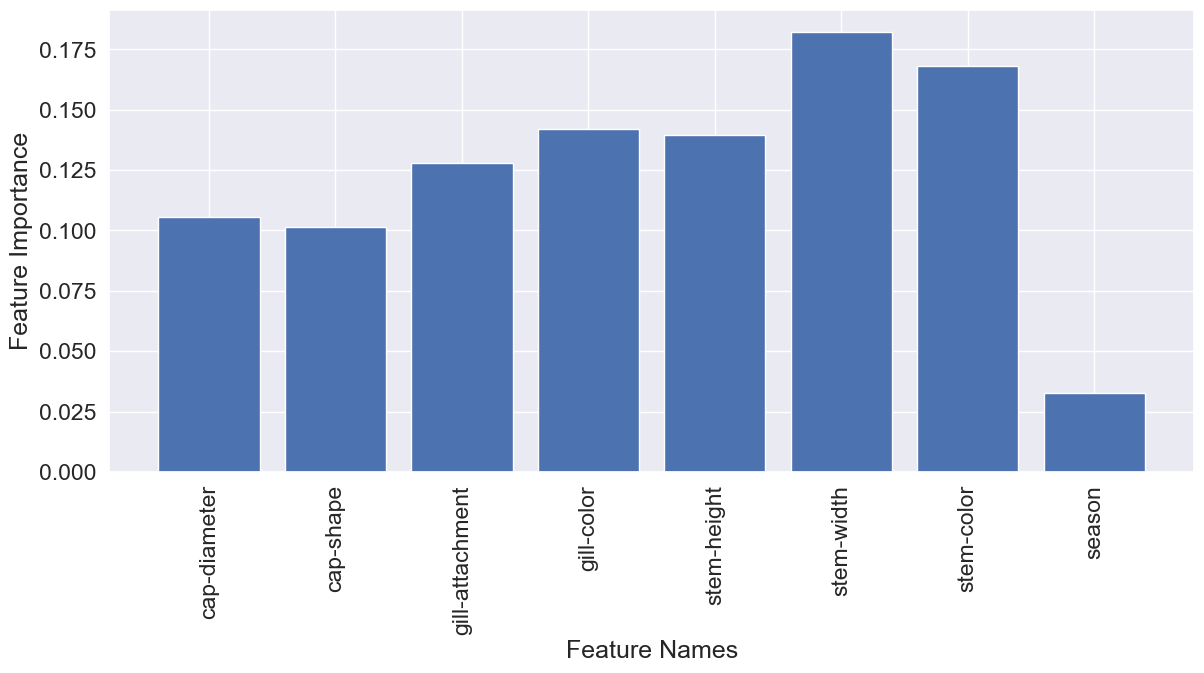

In [ ]:
# Get feature importances
feature_importances = best_Tree.feature_importances_


feature_names = X_train.columns

# Plot the feature importances
sns.set(font_scale=1.5)
plt.figure(figsize=(14, 6))
plt.bar(list(feature_names), feature_importances)
plt.xlabel("Feature Names")
plt.ylabel("Feature Importance")
plt.xticks(rotation=90)
plt.show()

For this specific Decision Tree the feature stem-width seems to be the most important, but in generall the difference between the importance of all the features is not too large. It also makes sense that season is the least important feature, as most mushrooms grow best under certain weather conditions of whether they are poisonous or not.

The tree has a large depth, so it's really hard to read when we try to visualize the whole thing but for readability, let's at least visualize it up to depth=2.

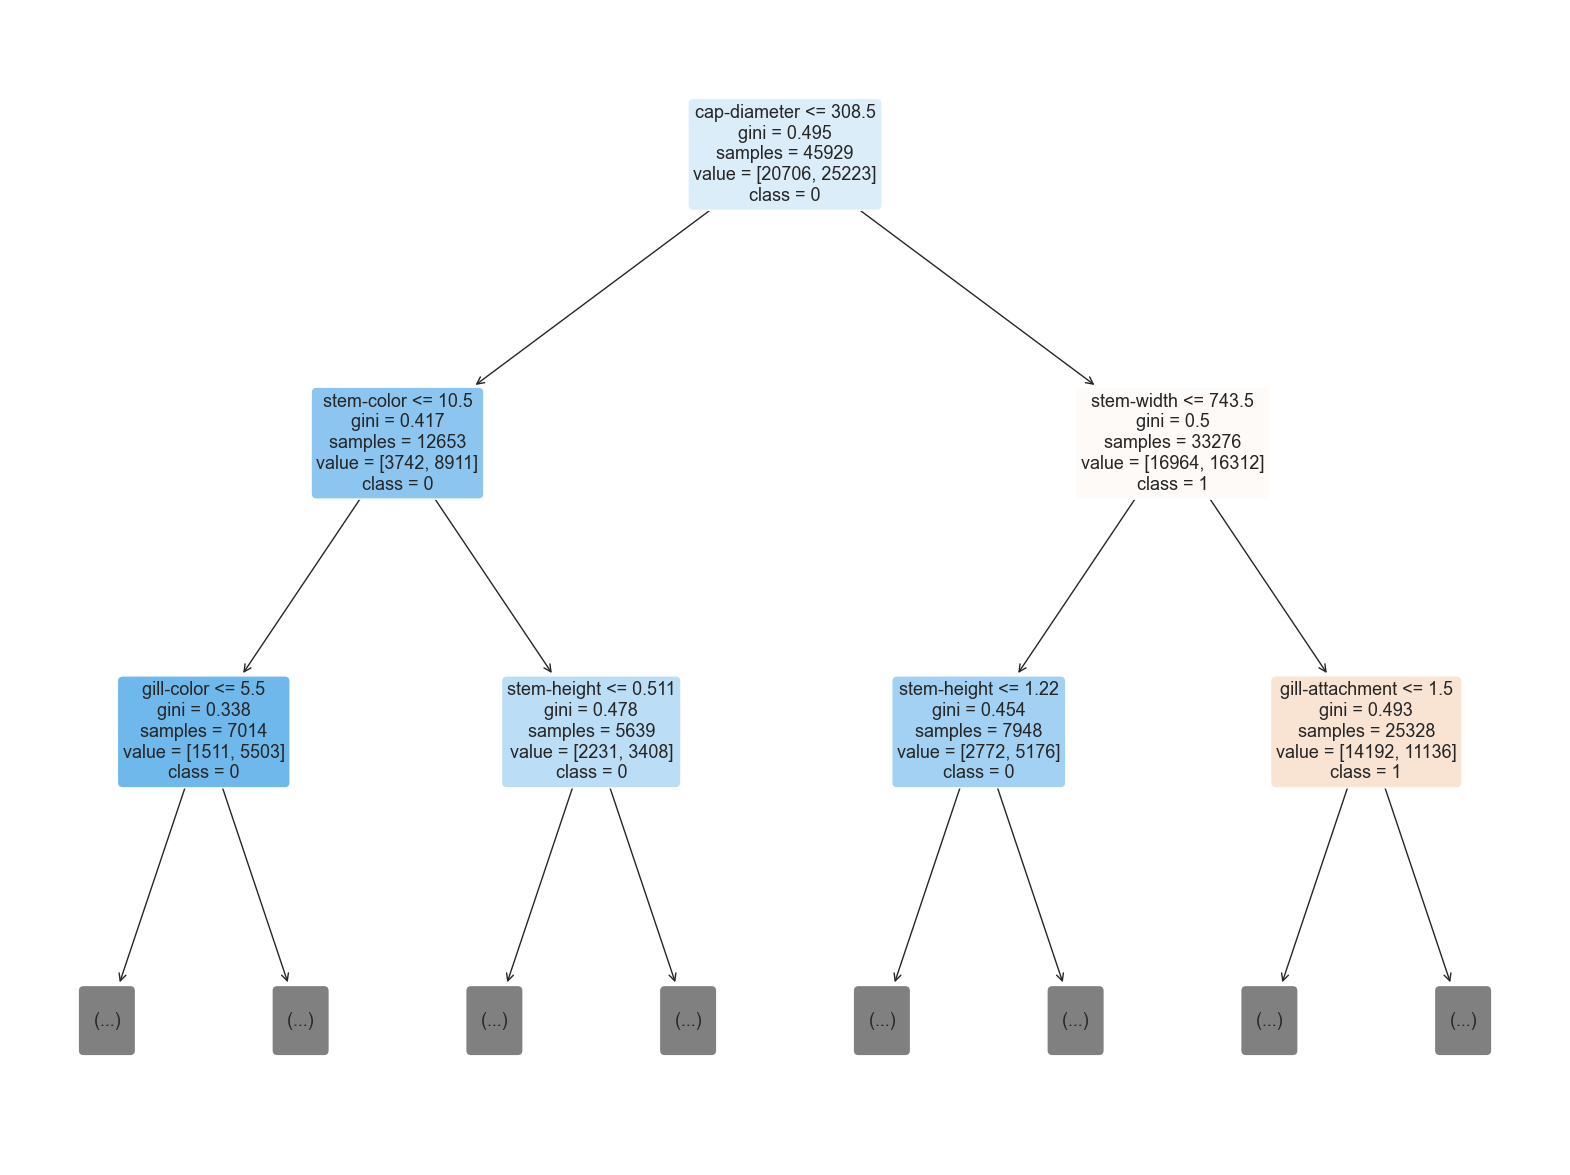

In [ ]:
feature_names_list = feature_names.tolist()
# Visualize the tree with limited depth
plt.figure(figsize=(20, 15))
plot_tree(
    best_Tree,
    feature_names=feature_names_list,
    class_names=[str(class_name) for class_name in y_train.unique()],
    filled=True,
    rounded=True,
    max_depth=2  # Limit the depth of the tree to make it more readable
)
plt.show()

The visualization of a Decision Tree usually doesn’t give too many insights, as it is a really complex construct and hard to read, and in our case it’s also not really helping a lot to gain a much deeper understanding. Nevertheless, it is interesting to see that each of the first nodes splits the data relatively evenly. Another thing that we can notice is that in the first two layers, it uses continuous features for it’s conditions, first the stem-width and then for both nodes in the second layer the stem-height, but with very different thresholds for the same feature.

## **4.4 Random Forest hyperparameters**

In [ ]:
depth = list(range(1,50))
features = list(range(1, 9)) # we have 8 features
features.append(None) # we also check the option of having max_features = None
samples_split = list(range(2,11))
samples_leaf = list(range(1,11))

param_distributions = {'max_depth': depth, 'min_samples_split': samples_split, 'min_samples_leaf': samples_leaf, 'max_features': features}

random_search_f = RandomizedSearchCV(simple_forest, param_distributions=param_distributions, n_iter=100, cv=5, random_state=42, verbose=3)

random_search_f.fit(X_train, y_train)

print("Best CV score:", random_search_f.best_score_)
print("Best parameter:", random_search_f.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END max_depth=20, max_features=5, min_samples_leaf=6, min_samples_split=2;, score=0.987 total time=   4.2s
[CV 2/5] END max_depth=20, max_features=5, min_samples_leaf=6, min_samples_split=2;, score=0.986 total time=   4.2s
[CV 3/5] END max_depth=20, max_features=5, min_samples_leaf=6, min_samples_split=2;, score=0.985 total time=   4.4s
[CV 4/5] END max_depth=20, max_features=5, min_samples_leaf=6, min_samples_split=2;, score=0.986 total time=   4.2s
[CV 5/5] END max_depth=20, max_features=5, min_samples_leaf=6, min_samples_split=2;, score=0.986 total time=   4.4s
[CV 1/5] END max_depth=2, max_features=1, min_samples_leaf=6, min_samples_split=7;, score=0.643 total time=   0.5s
[CV 2/5] END max_depth=2, max_features=1, min_samples_leaf=6, min_samples_split=7;, score=0.639 total time=   0.5s
[CV 3/5] END max_depth=2, max_features=1, min_samples_leaf=6, min_samples_split=7;, score=0.655 total time=   0.5s
[CV 4/5] END

In [ ]:
# Define the best parameters
forest_depth = random_search_f.best_params_['max_depth']
forest_min_samples_leaf = random_search_f.best_params_['min_samples_leaf']
forest_min_samples_split = random_search_f.best_params_['min_samples_split']
forest_max_features = random_search_f.best_params_['max_features']

Cross-Validation and Training Scores:
Training Accuracy: 1.0
Std Dev Training Accuracy: 0.0

Validation Accuracy: 0.9901151440957523
Std Dev Validation Accuracy: 0.0011573393677252468



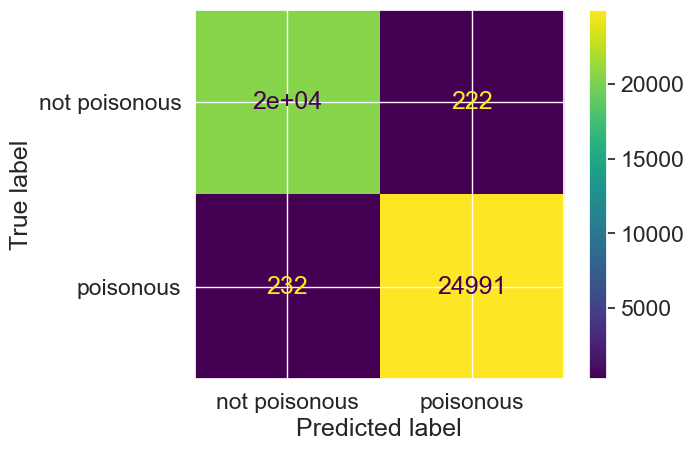

In [ ]:
best_Forest = RandomForestClassifier(max_depth=forest_depth, min_samples_split=forest_min_samples_split, min_samples_leaf=forest_min_samples_leaf, max_features = forest_max_features, n_estimators = 500, random_state=42)

# Perform cross-validation
cv_results = cross_validate(best_Forest, X_train, y_train, cv=5, return_train_score=True)
Forest_score = cv_results['train_score'].mean()

# Print the training and the validation scores
print("Cross-Validation and Training Scores:")
print(f"Training Accuracy: {cv_results['train_score'].mean()}")
print(f"Std Dev Training Accuracy: {cv_results['train_score'].std()}")
print()
print(f"Validation Accuracy: {cv_results['test_score'].mean()}")
print(f"Std Dev Validation Accuracy: {cv_results['test_score'].std()}")
print()

# Plot the confusion matrix
pred_best_Forest = cross_val_predict(best_Forest, X_train, y_train, cv=5)
cm_best_Forest = confusion_matrix(y_train, pred_best_Forest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_Forest, display_labels=["not poisonous", "poisonous"])

disp.plot()
plt.show()

In [ ]:
# Cross-validation metrics

best_Forest_recall= recall_score(y_train, pred_best_Forest)
best_Forest_specificity = recall_score(y_train, pred_best_Forest, pos_label=0)
best_Forest_precision = precision_score(y_train, pred_best_Forest)
best_Forest_f1 = f1_score(y_train, pred_best_Forest)

print(f"{best_Forest_recall=}")
print(f"{best_Forest_specificity=}")
print(f"{best_Forest_precision=}")
print(f"{best_Forest_f1=}")

best_Forest_recall=0.9908020457518931
best_Forest_specificity=0.9892784700086932
best_Forest_precision=0.9911950184428667
best_Forest_f1=0.9909984931398207


In [ ]:
# Fit the training set
best_Forest.fit(X_train, y_train)

# Predict on the training set
y_train_pred = best_Forest.predict(X_train)

# Calculate training metrics
train_precision = precision_score(y_train, y_train_pred)
train_specificity = recall_score(y_train, y_train_pred, pos_label=0)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print(f"Training Recall: {train_recall:.2f}")
print(f"Training Specificity: {train_specificity:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training F1 Score: {train_f1:.2f}")

Training Recall: 1.00
Training Specificity: 1.00
Training Precision: 1.00
Training F1 Score: 1.00


Here is our best Random Forest model as well that works slightly better with the best parameters found

[0.14537016 0.09391314 0.12162026 0.12181705 0.12971271 0.21909284
 0.12792103 0.04055281]


/Users/ekaterinaboyarkina/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ekaterinaboyarkina/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ekaterinaboyarkina/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


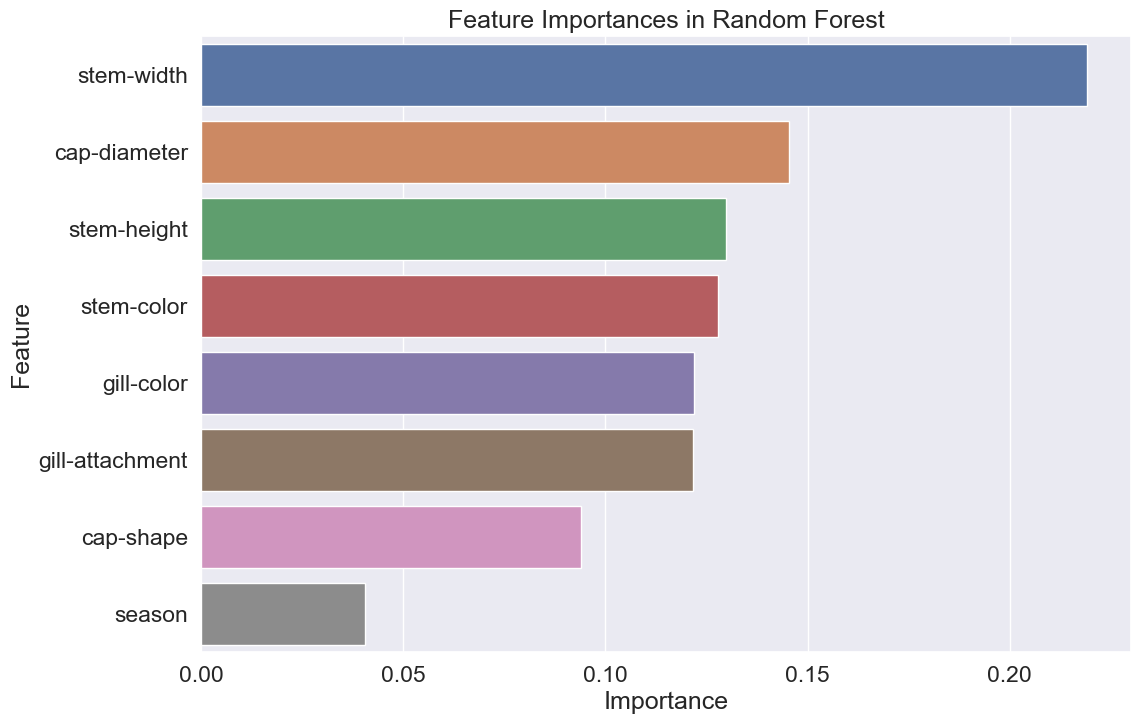

In [ ]:
# Get feature importances
feature_importances = best_Forest.feature_importances_
features = X_train.columns

print(feature_importances)

# Create a DataFrame for the feature importances
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Just like with kNN, we will try to look for the best threshold to minimize the recall:

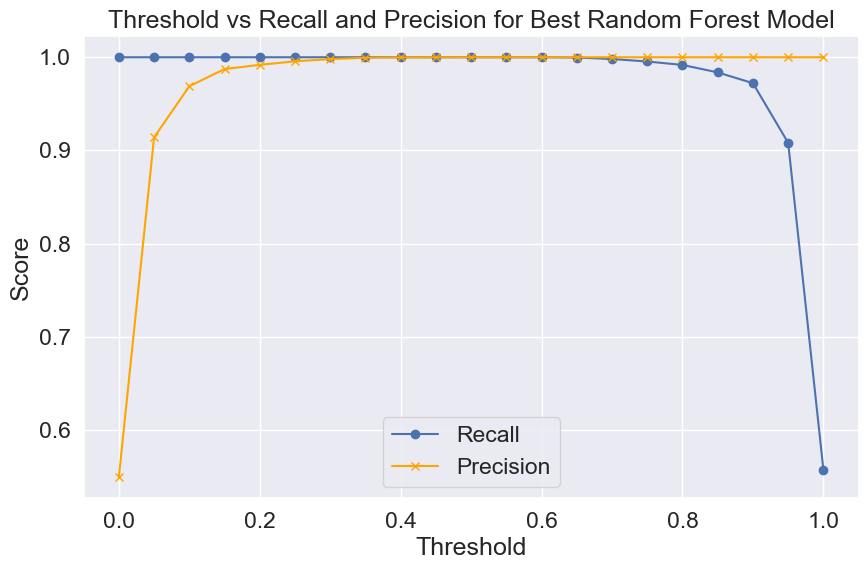

In [ ]:
best_forest = random_search_f.best_estimator_

# Predict probabilities
y_proba = best_forest.predict_proba(X_train)[:, 1]

# Define thresholds
thresholds = np.arange(0.0, 1.05, 0.05)

# Compute recall and precision for each threshold
recalls = []
precisions = []

for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    recall = recall_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recalls.append(recall)
    precisions.append(precision)

# Plot threshold vs recall and precision
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, marker='o', label='Recall')
plt.plot(thresholds, precisions, marker='x', label='Precision', color='orange')
plt.title('Threshold vs Recall and Precision for Best Random Forest Model')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
y_pred = (y_proba >= 0.5).astype(int)
recall = recall_score(y_train, y_pred)
print(recall)

1.0


Looking at the graph, recall is more or less the same for all thresholds, so we decide to not tune that and leave our best_Forest model as it is.

**Hyperparameter search result:** an interesting observation we can make is that for all models the best hyperparameters did not add a large improvement to the very simple models without any tuning.

# **5. Computing test scores for the best models**

## **5.1 Confusion Matrix**

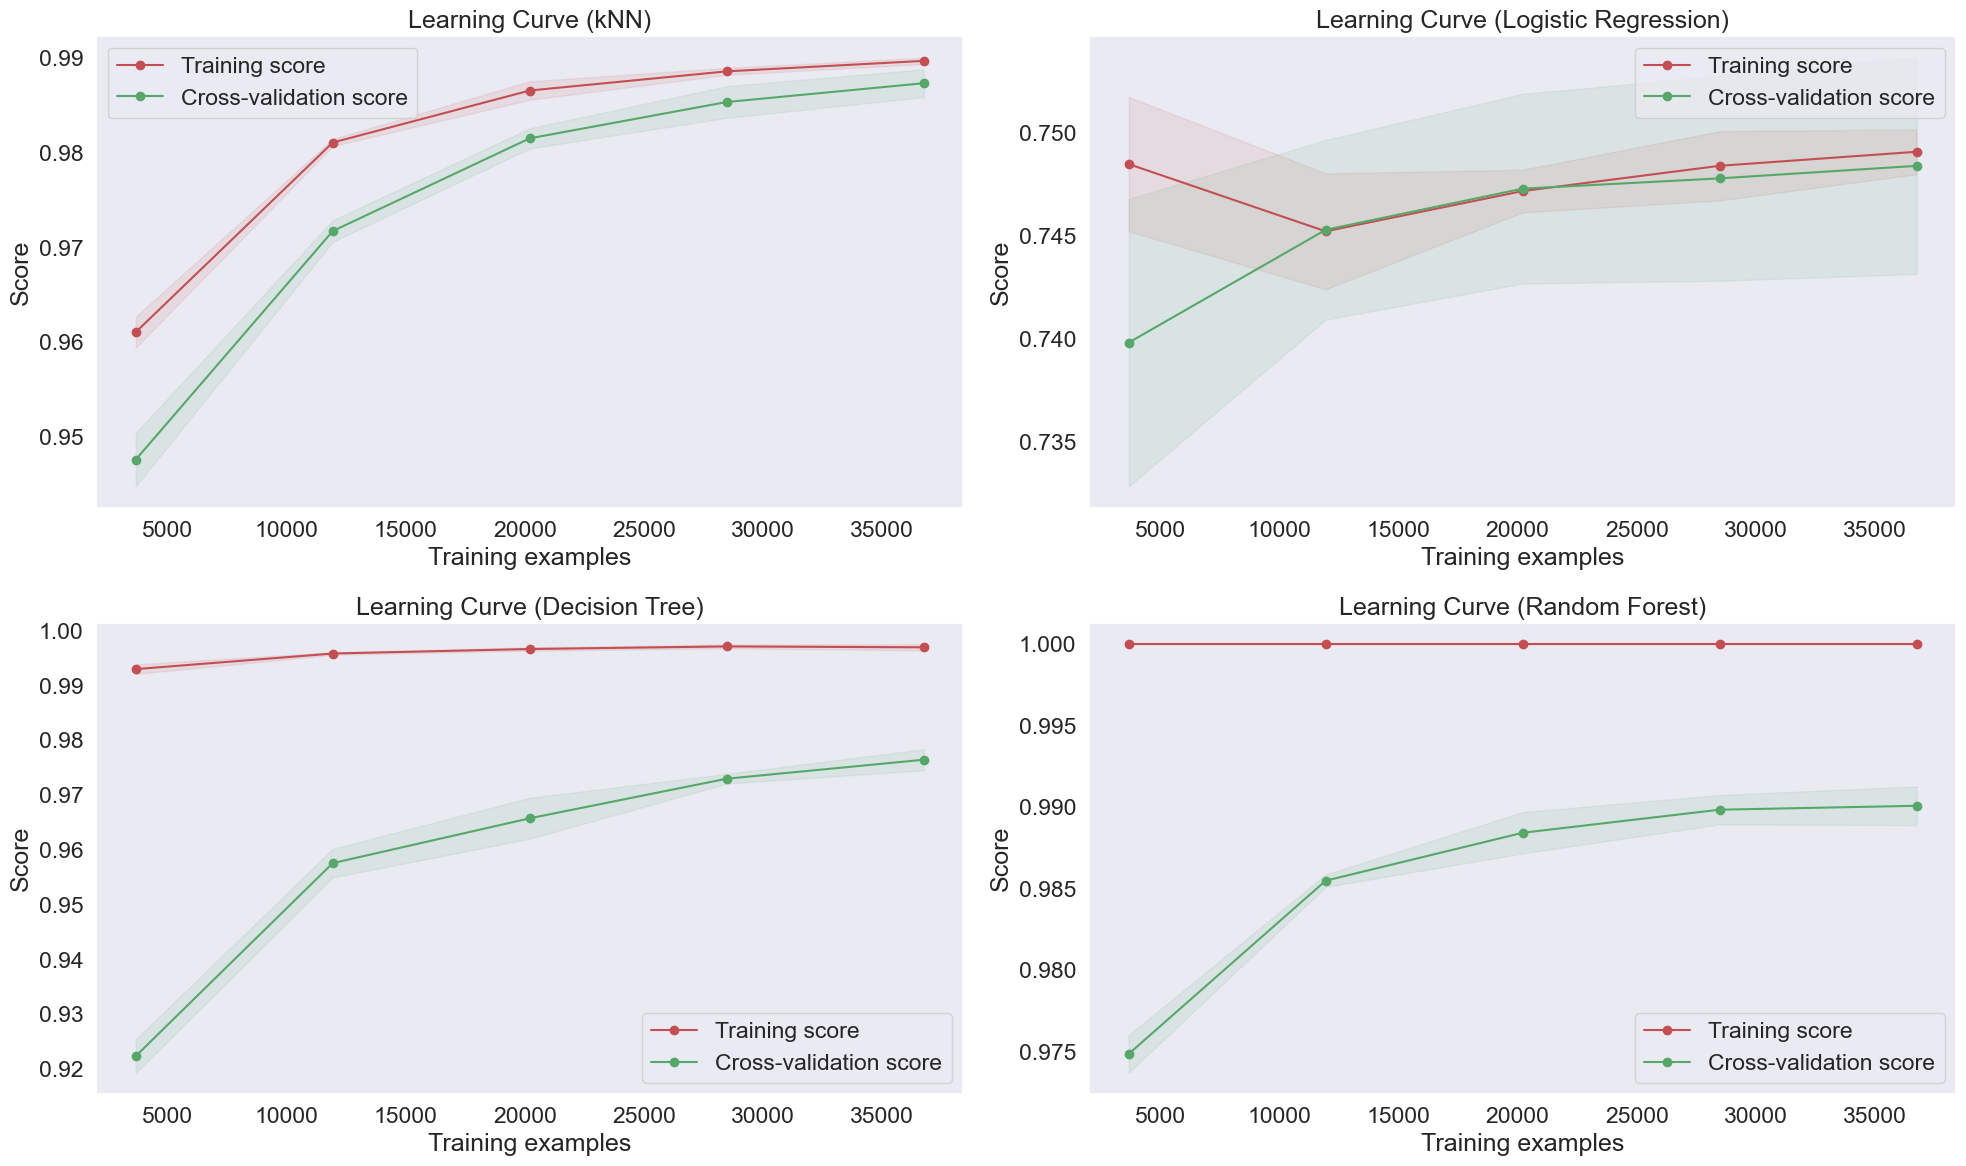

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 6))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    axes.grid()

    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")

    axes.legend(loc="best")

    return axes

# Plotting learning curves for all models
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

plot_learning_curve(pipe_best_kNN, "Learning Curve (kNN)", X_train, y_train, axes=axes[0, 0], cv=5, n_jobs=-1)
plot_learning_curve(pipe_l2_best_log_reg, "Learning Curve (Logistic Regression)", X_train, y_train, axes=axes[0, 1], cv=5, n_jobs=-1)
plot_learning_curve(best_Tree, "Learning Curve (Decision Tree)", X_train, y_train, axes=axes[1, 0], cv=5, n_jobs=-1)
plot_learning_curve(best_Forest, "Learning Curve (Random Forest)", X_train, y_train, axes=axes[1, 1], cv=5, n_jobs=-1)

plt.tight_layout()
plt.show()

The results above show that all the models are fitting well on the data and are performing ideally. We don't have any overfitting or underfitting issue.

In [ ]:
# kNN
# Predict on the test set
y_pred_kNN = pipe_best_kNN.predict(X_test)
y_proba_kNN = pipe_best_kNN.predict_proba(X_test)[:, 1]

# Compute metrics
accuracy_kNN = accuracy_score(y_test, y_pred_kNN)
precision_kNN = precision_score(y_test, y_pred_kNN, average='binary')
recall_kNN = recall_score(y_test, y_pred_kNN, average='binary')
f1_kNN = f1_score(y_test, y_pred_kNN, average='binary')

print(recall_kNN)
print(accuracy_kNN)

0.9916891284815813
0.9892672094744633


In [ ]:
#kNN with best threshold
y_pred_kNN_threshold = (y_proba_kNN >= 0.3).astype(int)

# Compute metrics
accuracy_kNN_threshold = accuracy_score(y_test, y_pred_kNN_threshold)
precision_kNN_threshold = precision_score(y_test, y_pred_kNN_threshold, average='binary')
recall_kNN_threshold = recall_score(y_test, y_pred_kNN_threshold, average='binary')
f1_kNN_threshold = f1_score(y_test, y_pred_kNN_threshold, average='binary')

print(recall_kNN_threshold)
print(accuracy_kNN_threshold)

0.995507637017071
0.9842092277325438


Still deciding if we want to leave the kNN model with the new optimal threshold, we printed out some metrics to compare and the recall is significantly better when we set threshold to 0.3, so we will also consider this model as one of our best ones.

In [ ]:
# Logistic Regression
pipe_l2_best_log_reg.fit(X_train, y_train)
y_pred_log_reg = pipe_l2_best_log_reg.predict(X_test)
y_proba_log_reg = pipe_l2_best_log_reg.predict_proba(X_test)[:, 1]

# Compute metrics
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='binary')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='binary')
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='binary')

In [ ]:
# Decision trees
# Predict on the test set
best_Tree.fit(X_train, y_train)

y_pred_tree = best_Tree.predict(X_test)
y_proba_tree = best_Tree.predict_proba(X_test)[:, 1]

# Compute metrics
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='binary')
recall_tree = recall_score(y_test, y_pred_tree, average='binary')
f1_tree = f1_score(y_test, y_pred_tree, average='binary')

In [ ]:
# Random forest
# Predict on the test set
best_Forest.fit(X_train, y_train)
y_pred_forest = best_Forest.predict(X_test)
y_proba_forest = best_Forest.predict_proba(X_test)[:, 1]

# Compute metrics
accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest, average='binary')
recall_forest = recall_score(y_test, y_pred_forest, average='binary')
f1_forest = f1_score(y_test, y_pred_forest, average='binary')

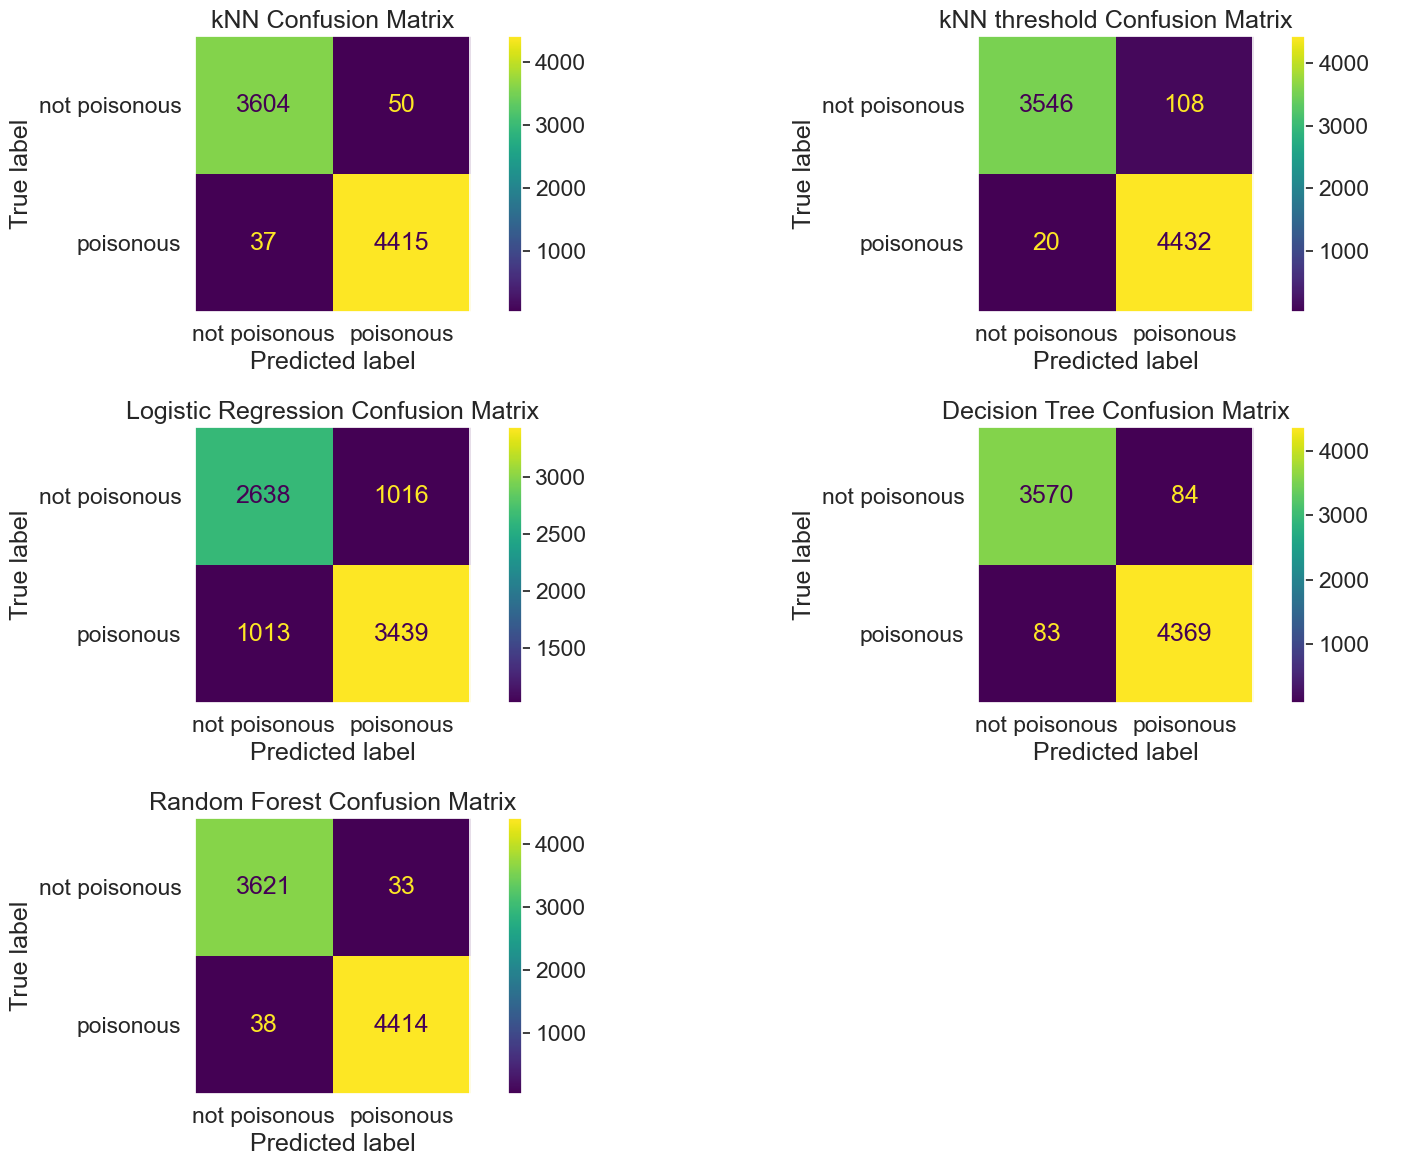

In [ ]:
# Compute the confusion matrices
cm_kNN_threshold = confusion_matrix(y_test, y_pred_kNN_threshold)
cm_kNN = confusion_matrix(y_test, y_pred_kNN)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_forest = confusion_matrix(y_test, y_pred_forest)

# Define display labels
display_labels = ["not poisonous", "poisonous"]

# Plot the confusion matrices in a 2x2 grid
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# kNN
disp_kNN = ConfusionMatrixDisplay(confusion_matrix=cm_kNN, display_labels=display_labels)
disp_kNN.plot(ax=axes[0, 0], values_format='d')
axes[0, 0].set_title('kNN Confusion Matrix')
axes[0, 0].grid(False)

# kNN with threshold
disp_knn_regular = ConfusionMatrixDisplay(confusion_matrix=cm_kNN_threshold, display_labels=display_labels)
disp_knn_regular.plot(ax=axes[0, 1], values_format='d')
axes[0, 1].set_title('kNN threshold Confusion Matrix')
axes[0, 1].grid(False)

# Logistic Regression
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=display_labels)
disp_log_reg.plot(ax=axes[1, 0], values_format='d')
axes[1, 0].set_title('Logistic Regression Confusion Matrix')
axes[1, 0].grid(False)

# Decision Tree
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=display_labels)
disp_tree.plot(ax=axes[1, 1], values_format='d')
axes[1, 1].set_title('Decision Tree Confusion Matrix')
axes[1, 1].grid(False)

# Random Forest
disp_forest = ConfusionMatrixDisplay(confusion_matrix=cm_forest, display_labels=display_labels)
disp_forest.plot(ax=axes[2, 0], values_format='d')
axes[2, 0].set_title('Random Forest Confusion Matrix')
axes[2, 0].grid(False)

axes[2, 1].axis('off')



plt.tight_layout()
plt.show()

We can see that the performance on the test set is really similar to the performance on the cross validation sets during training.
When comparing the different models with the best hyperparameters it is easy to see that Random Forest and kNN work very well and their result are really close even though Random Forest works a tiny bit better. Decision Trees are also achieving pretty good results. The only model that doesn't perform well on our data even after a lot of hyperparameter searching is Logistic Regression. kNN with the threshold works great in terms of recall but even without it it's pretty good.

## **5.2 binary classification model**

### **5.2.1 Receiver Operating Characteristic Curve**

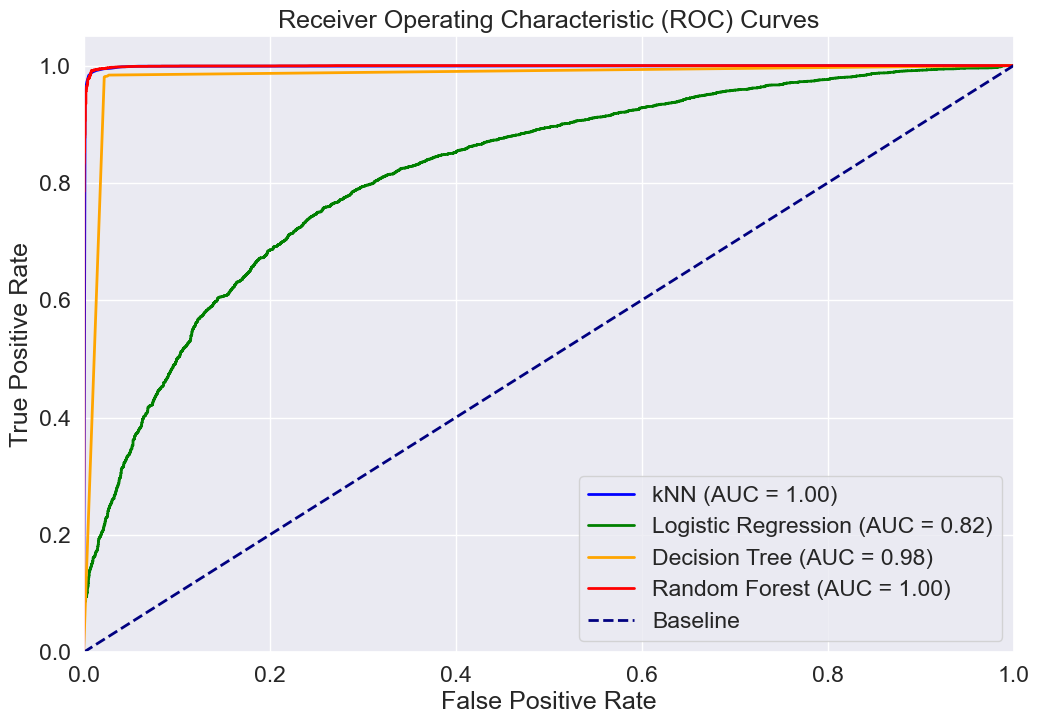

In [ ]:
# Compute ROC curves and AUC scores
fpr_kNN, tpr_kNN, _ = roc_curve(y_test, y_proba_kNN)
roc_auc_kNN = auc(fpr_kNN, tpr_kNN)

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_proba_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

fpr_forest, tpr_forest, _ = roc_curve(y_test, y_proba_forest)
roc_auc_forest = auc(fpr_forest, tpr_forest)

# Plot ROC curves
plt.figure(figsize=(12, 8))

plt.plot(fpr_kNN, tpr_kNN, color='blue', lw=2, label=f'kNN (AUC = {roc_auc_kNN:.2f})')
plt.plot(fpr_log_reg, tpr_log_reg, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_tree, tpr_tree, color='orange', lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot(fpr_forest, tpr_forest, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_forest:.2f})')

# Plot baseline
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


### **5.2.2 Precision-Recall Curve**

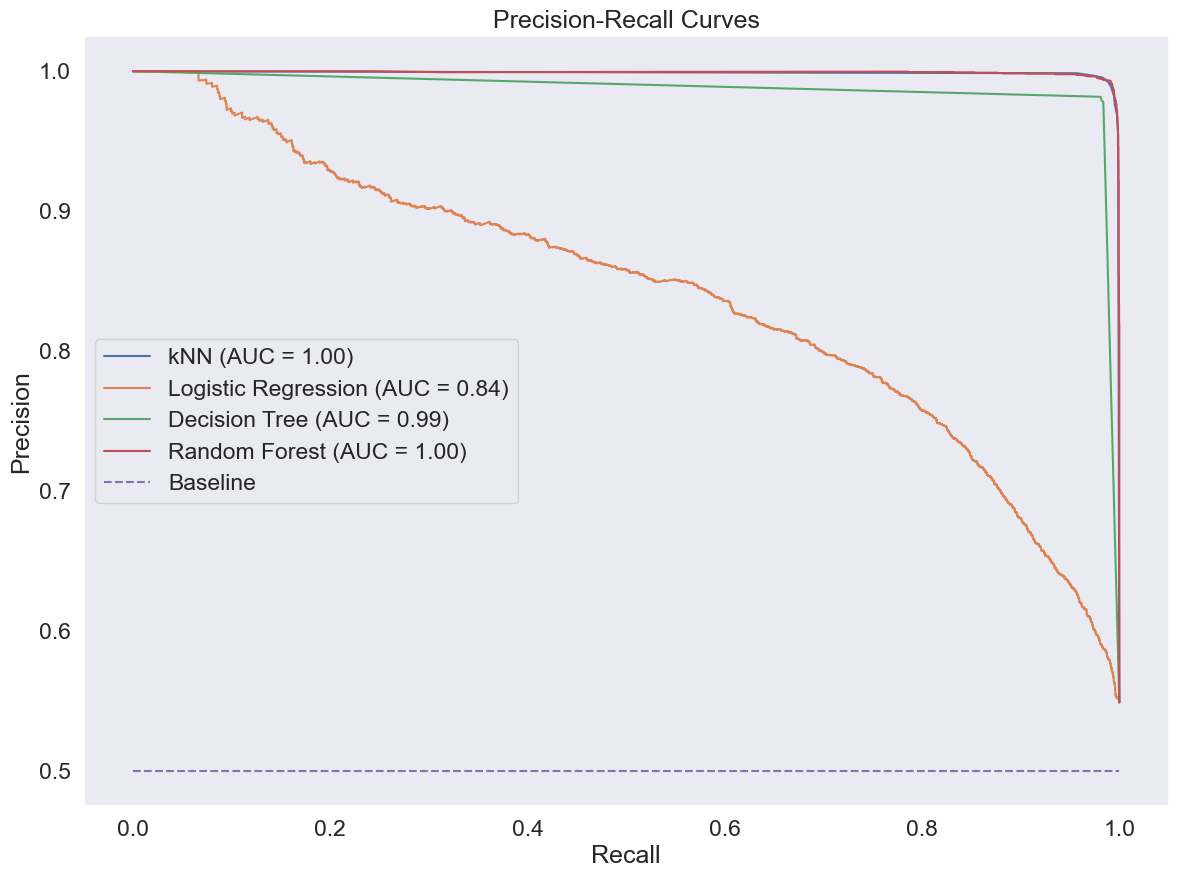

In [ ]:
# Compute Precision-Recall curve and AUC for each model
precision_kNN_, recall_kNN_, _ = precision_recall_curve(y_test, y_proba_kNN)
pr_auc_kNN = auc(recall_kNN_, precision_kNN_)

'''
precision_kNN_t, recall_kNN_t, _ = precision_recall_curve(y_test, y_proba_kNN)
pr_auc_kNN_t = auc(recall_kNN_t, precision_kNN_t)
'''

precision_log_reg_, recall_log_reg_, _ = precision_recall_curve(y_test, y_proba_log_reg)
pr_auc_log_reg = auc(recall_log_reg_, precision_log_reg_)

precision_tree_, recall_tree_, _ = precision_recall_curve(y_test, y_proba_tree)
pr_auc_tree = auc(recall_tree_, precision_tree_)

precision_forest_, recall_forest_, _ = precision_recall_curve(y_test, y_proba_forest)
pr_auc_forest = auc(recall_forest_, precision_forest_)

# Plot Precision-Recall curves
plt.figure(figsize=(14, 10))

# kNN
plt.plot(recall_kNN_, precision_kNN_, label=f'kNN (AUC = {pr_auc_kNN:.2f})')
# Logistic Regression
plt.plot(recall_log_reg_, precision_log_reg_, label=f'Logistic Regression (AUC = {pr_auc_log_reg:.2f})')
# Decision Tree
plt.plot(recall_tree_, precision_tree_, label=f'Decision Tree (AUC = {pr_auc_tree:.2f})')
# Random Forest
plt.plot(recall_forest_, precision_forest_, label=f'Random Forest (AUC = {pr_auc_forest:.2f})')
'''
#kNN with threshold
plt.plot(recall_kNN_threshold, precision_kNN_threshold, label=f'kNN with threshold (AUC = {pr_auc_kNN_t:.2f})')
'''

# Baseline
plt.plot([0, 1], [0.5, 0.5], linestyle='--', label='Baseline')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='best')
plt.grid()
plt.show()

Same conclusions for these two graphs:

The worst model so far is the Logistic Regression one.

## **5.3 Underfitting and Overfitting check**

In [ ]:
# Organize the scores into a table

table_data = [
    ["kNN", kNN_score, accuracy_kNN, precision_kNN, recall_kNN, f1_kNN],
    ["kNN with optimal threshold", '-', accuracy_kNN_threshold, precision_kNN_threshold, recall_kNN_threshold, f1_kNN_threshold],
    ["Logistic Regression", LogReg_score, accuracy_log_reg, precision_log_reg, recall_log_reg, f1_log_reg],
    ["Decision Tree", Tree_score, accuracy_tree, precision_tree, recall_tree, f1_tree],
    ["Random Forest", Forest_score, accuracy_forest, precision_forest, recall_forest, f1_forest]
]

# Define the headers
headers = ["Algorithm", "CV Score", "Test Score", "Test Precision", "Test Recall", "Test F1 Score"]

# Print the table using tabulate
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+----------------------------+--------------------+--------------+------------------+---------------+-----------------+
| Algorithm                  | CV Score           |   Test Score |   Test Precision |   Test Recall |   Test F1 Score |
+============================+====================+==============+==================+===============+=================+
| kNN                        | 0.9936859068034002 |     0.989267 |         0.988802 |      0.991689 |        0.990243 |
+----------------------------+--------------------+--------------+------------------+---------------+-----------------+
| kNN with optimal threshold | -                  |     0.984209 |         0.976211 |      0.995508 |        0.985765 |
+----------------------------+--------------------+--------------+------------------+---------------+-----------------+
| Logistic Regression        | 0.7483943033711687 |     0.749692 |         0.771942 |      0.772462 |        0.772202 |
+----------------------------+----------

In [ ]:
# Check for duplicates
duplicates = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(num_duplicates)
print(len(df))

303
54035


At first, we were sceptical about the performance of our models because we get 99% accuracy for our best model but here is the check for duplicates, which shows that there are only 303 duplicates in a dataset consisting of 54000 instances. Now that we made sure that there are not so many duplicates, we came to the conclusion that we just got a "good" data set that works well with the models we used.

#**Conclusion：**

|Algorithm           | Perform | description                      |
| ------------------- | ------- | ----------------------------- |
| Random Forest         | 🌟 🌟       | The best score                     |
| kNN model             |  🌟 🌟 🌟      | Most meaningful                        |
| Decision Trees          |   🌟 🌟    | Performed very well on the dataset
| Logistic Regression             | ❌     |Each one performs poorly|






1.   We found that the **Random Forest** model achieved the **best** performance, with the **kNN** model performing nearly **as well as Random Forest**. **Decision Trees** also showed **strong** performance on our **dataset**.

2.   The only model that **didn't perform well** was **Logistic Regression**.

3.   In practical applications, we lean towards using the kNN model and adjusting it with an appropriate threshold to minimize recall, sacrificing some precision. While we achieve high scores across all metrics, reducing false negatives is crucial in real-world scenarios. Each false negative prediction implies that someone might blindly trust our model and consume a poisonous mushroom, potentially leading to severe consequences, even death.